In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 390

In [2]:
import fileinput

with fileinput.FileInput("D:\SEER\SEER_1973_2015_TEXTDATA\incidence\yr2000_2015.ca_ky_lo_nj_ga\BREAST.txt", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(' ', '_'), end='')

    

In [80]:
import fileinput

with fileinput.FileInput("D:\SEER\SEER_1973_2015_TEXTDATA\incidence\yr1992_2015.sj_la_rg_ak\BREAST.txt", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(' ', '_'), end='')

    

## Read in 4 available data sets

In [2]:
seer9= pd.read_fwf("D:\SEER\SEER_1973_2015_TEXTDATA\incidence\yr1973_2015.seer9\BREAST.txt", dtype=str, header=None)
sj_la_rg_ak= pd.read_fwf("D:\SEER\SEER_1973_2015_TEXTDATA\incidence\yr1992_2015.sj_la_rg_ak\BREAST.txt", dtype=str, header=None)
ca_ky_lo_nj_ga= pd.read_fwf("D:\SEER\SEER_1973_2015_TEXTDATA\incidence\yr2000_2015.ca_ky_lo_nj_ga\BREAST.txt", dtype=str, header=None)
lo_2nd_half= pd.read_fwf("D:\SEER\SEER_1973_2015_TEXTDATA\incidence\yr2005.lo_2nd_half\BREAST.txt", dtype=str, header=None)


In [3]:
vars_to_keep = ['MAR_STAT','RACE1V','SEX','AGE_DX','PRIMSITE','LATERAL','HISTO2V','BEHO2V','HISTO3V',
                'BEHO3V','GRADE','CSTUMSIZ','CSEXTEN','CSLYMPHN','CSMETSDX','CS1SITE','CS2SITE','CS3SITE',
                'CS4SITE','CS5SITE','CS6SITE','CS25SITE','DAJCCT','DAJCCN','DAJCCM','DAJCCSTG','DSS1977S',
                'DSS2000S','DAJCCFL','NO_SURG','cs0204schema','HST_STGA','FIRSTPRM','CODPUB','STAT_REC',
                'VSRTSADX','ODTHCLASS','CS8SITE','CS10SITE','CS11SITE','CS13SITE','CS15SITE','CS16SITE',
                'srv_time_mon','DAJCC7T','DAJCC7N','DAJCC7M','DAJCC7STG','CS7SITE','CS9SITE','CS12SITE',
                'brst_sub','CSMETSDXB_PUB','CSMETSDXBR_PUB','CSMETSDXLIV_PUB','CSMETSDXLUNG_PUB',
                'MALIGCOUNT','BENBORDCOUNT']


## Transform data per each data set - seer9

In [4]:
seer9['all']=seer9.astype(str)

In [5]:
# Page 6 in description
seer9['PUBCSNUM']=seer9['all'].str[0:8] # Patient ID number Leng 8
seer9['REG']=seer9['all'].str[8:18] # Registry ID number Leng 10
seer9['MAR_STAT']=seer9['all'].str[18:19] # Marital Status at DX number Leng 1
seer9['RACE1V']=seer9['all'].str[19:21] # Race/Ethnicity  Leng 2
seer9['NHIADE']=seer9['all'].str[22:23] # NHIA Derived Hispanic Origin Leng 1
seer9['SEX']=seer9['all'].str[23:24] # Sex Leng 1
seer9['AGE_DX']=seer9['all'].str[24:27] # Age at diagnosis Leng 3
seer9['YR_BRTH']=seer9['all'].str[27:31] # Year of Birth Leng 4
seer9['SEQ_NUM']=seer9['all'].str[34:36] # Sequence Number—Central Leng 2
seer9['MDXRECMP']=seer9['all'].str[36:38] # Month of diagnosis Leng 2
seer9['YEAR_DX']=seer9['all'].str[38:42] # Year of diagnosis Leng 4
seer9['PRIMSITE']=seer9['all'].str[42:46] # Primary Site Leng 4
seer9['LATERAL']=seer9['all'].str[46:47] # Laterality Leng 1
seer9['HISTO2V']=seer9['all'].str[47:51] # Histology (92-00) ICD-O-2 Leng 4
seer9['BEHO2V']=seer9['all'].str[51:52] # Behavior (92-00) ICD-O-2 Leng 1
seer9['HISTO3V']=seer9['all'].str[52:56] # Histologic Type ICD-O-3 Leng 4
seer9['BEHO3V']=seer9['all'].str[56:57] # Behavior Code ICD-O-3 Leng 1
seer9['GRADE']=seer9['all'].str[57:58] # Grade Leng 1
seer9['DX_CONF']=seer9['all'].str[58:59] # Diagnostic Confirmation Leng 1 
seer9['REPT_SRC']=seer9['all'].str[59:60] # Type of Reporting Source Leng 1 
seer9['EOD10_SZ']=seer9['all'].str[60:63] # EOD—Tumor Size Leng 3 
seer9['EOD10_EX']=seer9['all'].str[63:65] # EOD—Extension Leng 2 
seer9['EOD10_PE']=seer9['all'].str[65:67] # EOD—Extension Prost Path Leng 2
seer9['EOD10_ND']=seer9['all'].str[67:68] # EOD—Lymph Node Involv Leng 1 
seer9['EOD10_PN']=seer9['all'].str[68:70] # Regional Nodes Positive Leng 2
seer9['EOD10_NE']=seer9['all'].str[70:72] # Regional Nodes Examined Leng 2 
seer9['EOD13']=seer9['all'].str[72:85] # EOD—Old 13 Digit Leng 13 
seer9['EOD2']=seer9['all'].str[85:87] # EOD—Old 2 Digit Leng 2 
seer9['EOD4']=seer9['all'].str[87:91] # EOD—Old 4 Digit Leng 4
seer9['EOD_CODE']=seer9['all'].str[91:92] # Coding System for EOD Leng 1 
seer9['TUMOR_1V']=seer9['all'].str[92:93] # Tumor Marker 1 Leng 1
seer9['TUMOR_2V']=seer9['all'].str[93:94] # Tumor Marker 2 Leng 1
seer9['TUMOR_3V']=seer9['all'].str[94:95] # Tumor Marker 3 Leng 1
seer9['CSTUMSIZ']=seer9['all'].str[95:98] # CS Tumor Size Leng 3 
seer9['CSEXTEN']=seer9['all'].str[98:101] # CS Extension Leng 3
seer9['CSLYMPHN']=seer9['all'].str[101:104] # CS Lymph Nodes Leng 3
seer9['CSMETSDX']=seer9['all'].str[104:106] # CS Mets at Dx Leng 2
seer9['CS1SITE']=seer9['all'].str[106:109] # CS Site-Specific Factor 1 Leng 3
seer9['CS2SITE']=seer9['all'].str[109:112] # CS Site-Specific Factor 2 Leng 3
seer9['CS3SITE']=seer9['all'].str[112:115] # CS Site-Specific Factor 3 Leng 3
seer9['CS4SITE']=seer9['all'].str[115:118] # CS Site-Specific Factor 4 Leng 3
seer9['CS5SITE']=seer9['all'].str[118:121] # CS Site-Specific Factor 5 Leng 3


In [6]:
# Page 7 in description
seer9['CS6SITE']=seer9['all'].str[121:124] # CS Site-Specific Factor 6 Leng 3
seer9['CS25SITE']=seer9['all'].str[124:127] # CS Site-Specific Factor 25 Leng 3
seer9['DAJCCT']=seer9['all'].str[127:129] # Derived AJCC T Leng 2
seer9['DAJCCN']=seer9['all'].str[129:131] # Derived AJCC N Leng 2
seer9['DAJCCM']=seer9['all'].str[131:133] # Derived AJCC M Leng 2
seer9['DAJCCSTG']=seer9['all'].str[133:135] # Derived AJCC Stage Group Leng 2
seer9['DSS1977S']=seer9['all'].str[135:136] # Derived SS1977 Leng 1
seer9['DSS2000S']=seer9['all'].str[136:137] # Derived SS2000 Leng 1
seer9['DAJCCFL']=seer9['all'].str[137:138] # Derived AJCC—Flag Leng 1
seer9['CSVFIRST']=seer9['all'].str[140:146] # CCS Version Input Original Leng 6
seer9['CSVLATES']=seer9['all'].str[146:152] # CS Version Derived Leng 6
seer9['CSVCURRENT']=seer9['all'].str[152:158] # CS Version Input Current Leng 6
seer9['SURGPRIF']=seer9['all'].str[158:160] # RX Summ—Surg Prim Site Leng 2
seer9['SURGSCOF']=seer9['all'].str[160:161] # RX Summ—Scope Reg LN Sur Leng 1
seer9['SURGSITF']=seer9['all'].str[161:162] # RX Summ—Surg Oth Reg/Dis Leng 1
seer9['NUMNODES']=seer9['all'].str[162:164] # RX Summ—Reg LN Examined Leng 2
seer9['NO_SURG']=seer9['all'].str[165:166] # Reason for no surgery Leng 1
seer9['SS_SURG']=seer9['all'].str[169:171] # RX Summ—Surgery Type Leng 2
seer9['SURGSCOP']=seer9['all'].str[173:174] # RX Summ—Scope Reg 98-02 Leng 1
seer9['SURGSITE']=seer9['all'].str[174:175] # RX Summ—Surg Oth 98-02 Leng 1
seer9['REC_NO']=seer9['all'].str[175:177] # SEER Record Number Leng 2
seer9['TYPE_FU']=seer9['all'].str[190:191] # SEER Type of Follow-up Leng 1
seer9['AGE_1REC']=seer9['all'].str[191:193] # Age Recode <1 Year olds Leng 2
seer9['SITERWHO']=seer9['all'].str[198:203] # Site Recode ICD-O-3/WHO 2008 Leng 5
seer9['ICDOTO9V']=seer9['all'].str[203:207] # Recode ICD-O-2 to 9 Leng 4
seer9['ICDOT10V']=seer9['all'].str[207:211] # Recode ICD-O-2 to 10 Leng 4
seer9['ICCC3WHO']=seer9['all'].str[217:220] # ICCC site recode ICD-O-3/WHO 2008 Leng 3
seer9['ICCC3XWHO']=seer9['all'].str[220:223] # ICCC site rec extended ICD-O-3/WHO 2008 Leng 3
seer9['BEHTREND']=seer9['all'].str[223:224] # Behavior Recode for Analysis Leng 1
seer9['HISTREC']=seer9['all'].str[225:227] # Histology Recode—Broad Groupings Leng 2
seer9['HISTRECB']=seer9['all'].str[227:229] # Histology Recode—Brain Groupings Leng 2
seer9['cs0204schema']=seer9['all'].str[229:232] # CS Schema v0204+ Leng 3
seer9['RAC_RECA']=seer9['all'].str[232:233] # Race recode (White, Black, Other) Leng 1
seer9['RAC_RECY']=seer9['all'].str[233:234] # Race recode (W, B, AI, API) Leng 1
seer9['ORIGRECB']=seer9['all'].str[234:235] # Origin recode NHIA (Hispanic, Non-Hisp) Leng 1
seer9['HST_STGA']=seer9['all'].str[235:236] # SEER historic stage A Leng 1
seer9['AJCC_STG']=seer9['all'].str[236:238] # AJCC stage 3rd edition (1988-2003) Leng 2
seer9['AJ_3SEER']=seer9['all'].str[238:240] # SEER modified AJCC Stage 3rd ed (1988-2003) Leng 2
seer9['SSS77VZ']=seer9['all'].str[240:241] #SEER Summary Stage 1977 (1995-2000) Leng 1
seer9['SSSM2KPZ']=seer9['all'].str[241:242] # SEER Summary Stage 2000 (2001-2003) Leng 1

In [7]:
# Page 8 in description
seer9['FIRSTPRM']=seer9['all'].str[244:245] # First malignant primary indicator Leng 1
seer9['ST_CNTY']=seer9['all'].str[245:250] # State-county recode Leng 5
seer9['CODPUB']=seer9['all'].str[254:259] # Cause of Death to SEER site recode Leng 5
seer9['CODPUBKM']=seer9['all'].str[259:264] # COD to site rec KM Leng 5
seer9['STAT_REC']=seer9['all'].str[264:265] # Vital Status recode Leng 1
seer9['IHSLINK']=seer9['all'].str[265:266] # IHS Link Leng 1
seer9['SUMM2K']=seer9['all'].str[266:267] # Summary stage 2000 (1998+) Leng 1
seer9['AYASITERWHO']=seer9['all'].str[267:269] # AYA site recode/WHO 2008 Leng 2
seer9['LYMSUBRWHO']=seer9['all'].str[269:271] # Lymphoma subtype recode/WHO 2008 Leng 2
seer9['VSRTSADX']=seer9['all'].str[271:272] # SEER Cause-Specific Death Classification Leng 1
seer9['ODTHCLASS']=seer9['all'].str[272:273] # SEER Other Cause of Death Classification Leng 1
seer9['CSTSEVAL']=seer9['all'].str[273:274] # CS Tumor Size/Ext Eval Leng 1
seer9['CSRGEVAL']=seer9['all'].str[274:275] # CS Lymph Nodes Eval Leng 1
seer9['CSMTEVAL']=seer9['all'].str[275:276] # CS Mets Eval Leng 1
seer9['intprim']=seer9['all'].str[276:277] # Primary by international rules Leng 1
seer9['erstatus']=seer9['all'].str[277:278] # ER Status Recode Breast Cancer (1990+) Leng 1
seer9['prstatus']=seer9['all'].str[278:279] # PR Status Recode Breast Cancer (1990+) Leng 1
seer9['csschema']=seer9['all'].str[279:281] # CS Schema -AJCC 6th ed (previously called v1) Leng 2
seer9['CS8SITE']=seer9['all'].str[281:284] # CS Site-Specific Factor 8 Leng 3
seer9['CS10SITE']=seer9['all'].str[284:287] # CS Site-Specific Factor 10 Leng 3
seer9['CS11SITE']=seer9['all'].str[287:290] # CS Site-Specific Factor 11 Leng 3
seer9['CS13SITE']=seer9['all'].str[290:293] # CS Site-Specific Factor 13 Leng 3
seer9['CS15SITE']=seer9['all'].str[293:296] # CS Site-Specific Factor 15 Leng 3
seer9['CS16SITE']=seer9['all'].str[296:299] # CS Site-Specific Factor 16 Leng 3
seer9['VASINV']=seer9['all'].str[299:300] # Lymph vascular invasion Leng 1
seer9['srv_time_mon']=seer9['all'].str[300:304] # Survival months Leng 4
seer9['srv_time_mon_flag']=seer9['all'].str[304:305] # Survival months flag Leng 1
seer9['INSREC_PUB']=seer9['all'].str[310:311] # Insurance recode (2007+) Leng 1
seer9['DAJCC7T']=seer9['all'].str[311:314] # Derived AJCC-7 T Leng 3
seer9['DAJCC7N']=seer9['all'].str[314:317] # Derived AJCC-7 N Leng 3
seer9['DAJCC7M']=seer9['all'].str[317:320] # Derived AJCC-7 M  Leng 3
seer9['DAJCC7STG']=seer9['all'].str[320:323] # Derived AJCC-7 Stage Grp Leng 3
seer9['ADJTM_6VALUE']=seer9['all'].str[323:325] # Breast Adjusted AJCC 6th T (1988+) Leng 2
seer9['ADJNM_6VALUE']=seer9['all'].str[325:327] # Breast Adjusted AJCC 6th N (1988+) Leng 2
seer9['ADJM_6VALUE']=seer9['all'].str[327:329] # Breast Adjusted AJCC 6th M (1988+) Leng 2
seer9['ADJAJCCSTG']=seer9['all'].str[329:331] # Breast Adjusted AJCC 6th Stage (1988+) Leng 2
seer9['CS7SITE']=seer9['all'].str[331:334] # CS Site-Specific Factor 7 Leng 3
seer9['CS9SITE']=seer9['all'].str[334:337] # CS Site-Specific Factor 9 Leng 3
seer9['CS12SITE']=seer9['all'].str[337:340] # CS Site-Specific Factor 12 Leng 3
seer9['her2']=seer9['all'].str[340:341] # Derived HER2 Recode (2010+) Leng 1


In [8]:
# Page 9 Introduction
seer9['brst_sub']=seer9['all'].str[341:342] # Breast Subtype (2010+) Leng 1
seer9['ANNARBOR']=seer9['all'].str[347:348] # Lymphomas: Ann Arbor Staging (1983+) Leng 1
seer9['CSMETSDXB_PUB']=seer9['all'].str[348:349] # CS Mets at Dx-Bone Leng 1
seer9['CSMETSDXBR_PUB']=seer9['all'].str[349:350] # CS Mets at Dx-Brain Leng 1
seer9['CSMETSDXLIV_PUB']=seer9['all'].str[350:351] # CS Mets at Dx-Liver Leng 1
seer9['CSMETSDXLUNG_PUB']=seer9['all'].str[351:352] # CS Mets at Dx-Lung Leng 1
seer9['T_VALUE']=seer9['all'].str[352:354] # T value - based on AJCC 3rd (1988-2003) Leng 2
seer9['N_VALUE']=seer9['all'].str[354:356] # N value - based on AJCC 3rd (1988-2003) Leng 2
seer9['M_VALUE']=seer9['all'].str[356:358] # M value - based on AJCC 3rd (1988-2003) Leng 2
seer9['MALIGCOUNT']=seer9['all'].str[358:360] # Total Number of In Situ/malignant Tumors for Patient Leng 2
seer9['BENBORDCOUNT']=seer9['all'].str[360:362] #Total Number of Benign/Borderline Tumors for Patient Leng 2

In [9]:
seer9=seer9.replace('_', np.nan)

In [10]:
seer9=seer9.replace('__', np.nan)

In [11]:
seer9=seer9.replace('___', np.nan)

In [12]:
seer9 = seer9[vars_to_keep]

## Transform the data per each data set - sj_la_rg_ak

In [13]:
sj_la_rg_ak['all']=sj_la_rg_ak.astype(str)

In [14]:
# Page 6 in description
sj_la_rg_ak['PUBCSNUM']=sj_la_rg_ak['all'].str[0:8] # Patient ID number Leng 8
sj_la_rg_ak['REG']=sj_la_rg_ak['all'].str[8:18] # Registry ID number Leng 10
sj_la_rg_ak['MAR_STAT']=sj_la_rg_ak['all'].str[18:19] # Marital Status at DX number Leng 1
sj_la_rg_ak['RACE1V']=sj_la_rg_ak['all'].str[19:21] # Race/Ethnicity  Leng 2
sj_la_rg_ak['NHIADE']=sj_la_rg_ak['all'].str[22:23] # NHIA Derived Hispanic Origin Leng 1
sj_la_rg_ak['SEX']=sj_la_rg_ak['all'].str[23:24] # Sex Leng 1
sj_la_rg_ak['AGE_DX']=sj_la_rg_ak['all'].str[24:27] # Age at diagnosis Leng 3
sj_la_rg_ak['YR_BRTH']=sj_la_rg_ak['all'].str[27:31] # Year of Birth Leng 4
sj_la_rg_ak['SEQ_NUM']=sj_la_rg_ak['all'].str[34:36] # Sequence Number—Central Leng 2
sj_la_rg_ak['MDXRECMP']=sj_la_rg_ak['all'].str[36:38] # Month of diagnosis Leng 2
sj_la_rg_ak['YEAR_DX']=sj_la_rg_ak['all'].str[38:42] # Year of diagnosis Leng 4
sj_la_rg_ak['PRIMSITE']=sj_la_rg_ak['all'].str[42:46] # Primary Site Leng 4
sj_la_rg_ak['LATERAL']=sj_la_rg_ak['all'].str[46:47] # Laterality Leng 1
sj_la_rg_ak['HISTO2V']=sj_la_rg_ak['all'].str[47:51] # Histology (92-00) ICD-O-2 Leng 4
sj_la_rg_ak['BEHO2V']=sj_la_rg_ak['all'].str[51:52] # Behavior (92-00) ICD-O-2 Leng 1
sj_la_rg_ak['HISTO3V']=sj_la_rg_ak['all'].str[52:56] # Histologic Type ICD-O-3 Leng 4
sj_la_rg_ak['BEHO3V']=sj_la_rg_ak['all'].str[56:57] # Behavior Code ICD-O-3 Leng 1
sj_la_rg_ak['GRADE']=sj_la_rg_ak['all'].str[57:58] # Grade Leng 1
sj_la_rg_ak['DX_CONF']=sj_la_rg_ak['all'].str[58:59] # Diagnostic Confirmation Leng 1 
sj_la_rg_ak['REPT_SRC']=sj_la_rg_ak['all'].str[59:60] # Type of Reporting Source Leng 1 
sj_la_rg_ak['EOD10_SZ']=sj_la_rg_ak['all'].str[60:63] # EOD—Tumor Size Leng 3 
sj_la_rg_ak['EOD10_EX']=sj_la_rg_ak['all'].str[63:65] # EOD—Extension Leng 2 
sj_la_rg_ak['EOD10_PE']=sj_la_rg_ak['all'].str[65:67] # EOD—Extension Prost Path Leng 2
sj_la_rg_ak['EOD10_ND']=sj_la_rg_ak['all'].str[67:68] # EOD—Lymph Node Involv Leng 1 
sj_la_rg_ak['EOD10_PN']=sj_la_rg_ak['all'].str[68:70] # Regional Nodes Positive Leng 2
sj_la_rg_ak['EOD10_NE']=sj_la_rg_ak['all'].str[70:72] # Regional Nodes Examined Leng 2 
sj_la_rg_ak['EOD13']=sj_la_rg_ak['all'].str[72:85] # EOD—Old 13 Digit Leng 13 
sj_la_rg_ak['EOD2']=sj_la_rg_ak['all'].str[85:87] # EOD—Old 2 Digit Leng 2 
sj_la_rg_ak['EOD4']=sj_la_rg_ak['all'].str[87:91] # EOD—Old 4 Digit Leng 4
sj_la_rg_ak['EOD_CODE']=sj_la_rg_ak['all'].str[91:92] # Coding System for EOD Leng 1 
sj_la_rg_ak['TUMOR_1V']=sj_la_rg_ak['all'].str[92:93] # Tumor Marker 1 Leng 1
sj_la_rg_ak['TUMOR_2V']=sj_la_rg_ak['all'].str[93:94] # Tumor Marker 2 Leng 1
sj_la_rg_ak['TUMOR_3V']=sj_la_rg_ak['all'].str[94:95] # Tumor Marker 3 Leng 1
sj_la_rg_ak['CSTUMSIZ']=sj_la_rg_ak['all'].str[95:98] # CS Tumor Size Leng 3 
sj_la_rg_ak['CSEXTEN']=sj_la_rg_ak['all'].str[98:101] # CS Extension Leng 3
sj_la_rg_ak['CSLYMPHN']=sj_la_rg_ak['all'].str[101:104] # CS Lymph Nodes Leng 3
sj_la_rg_ak['CSMETSDX']=sj_la_rg_ak['all'].str[104:106] # CS Mets at Dx Leng 2
sj_la_rg_ak['CS1SITE']=sj_la_rg_ak['all'].str[106:109] # CS Site-Specific Factor 1 Leng 3
sj_la_rg_ak['CS2SITE']=sj_la_rg_ak['all'].str[109:112] # CS Site-Specific Factor 2 Leng 3
sj_la_rg_ak['CS3SITE']=sj_la_rg_ak['all'].str[112:115] # CS Site-Specific Factor 3 Leng 3
sj_la_rg_ak['CS4SITE']=sj_la_rg_ak['all'].str[115:118] # CS Site-Specific Factor 4 Leng 3
sj_la_rg_ak['CS5SITE']=sj_la_rg_ak['all'].str[118:121] # CS Site-Specific Factor 5 Leng 3


In [15]:
# Page 7 in description
sj_la_rg_ak['CS6SITE']=sj_la_rg_ak['all'].str[121:124] # CS Site-Specific Factor 6 Leng 3
sj_la_rg_ak['CS25SITE']=sj_la_rg_ak['all'].str[124:127] # CS Site-Specific Factor 25 Leng 3
sj_la_rg_ak['DAJCCT']=sj_la_rg_ak['all'].str[127:129] # Derived AJCC T Leng 2
sj_la_rg_ak['DAJCCN']=sj_la_rg_ak['all'].str[129:131] # Derived AJCC N Leng 2
sj_la_rg_ak['DAJCCM']=sj_la_rg_ak['all'].str[131:133] # Derived AJCC M Leng 2
sj_la_rg_ak['DAJCCSTG']=sj_la_rg_ak['all'].str[133:135] # Derived AJCC Stage Group Leng 2
sj_la_rg_ak['DSS1977S']=sj_la_rg_ak['all'].str[135:136] # Derived SS1977 Leng 1
sj_la_rg_ak['DSS2000S']=sj_la_rg_ak['all'].str[136:137] # Derived SS2000 Leng 1
sj_la_rg_ak['DAJCCFL']=sj_la_rg_ak['all'].str[137:138] # Derived AJCC—Flag Leng 1
sj_la_rg_ak['CSVFIRST']=sj_la_rg_ak['all'].str[140:146] # CCS Version Input Original Leng 6
sj_la_rg_ak['CSVLATES']=sj_la_rg_ak['all'].str[146:152] # CS Version Derived Leng 6
sj_la_rg_ak['CSVCURRENT']=sj_la_rg_ak['all'].str[152:158] # CS Version Input Current Leng 6
sj_la_rg_ak['SURGPRIF']=sj_la_rg_ak['all'].str[158:160] # RX Summ—Surg Prim Site Leng 2
sj_la_rg_ak['SURGSCOF']=sj_la_rg_ak['all'].str[160:161] # RX Summ—Scope Reg LN Sur Leng 1
sj_la_rg_ak['SURGSITF']=sj_la_rg_ak['all'].str[161:162] # RX Summ—Surg Oth Reg/Dis Leng 1
sj_la_rg_ak['NUMNODES']=sj_la_rg_ak['all'].str[162:164] # RX Summ—Reg LN Examined Leng 2
sj_la_rg_ak['NO_SURG']=sj_la_rg_ak['all'].str[165:166] # Reason for no surgery Leng 1
sj_la_rg_ak['SS_SURG']=sj_la_rg_ak['all'].str[169:171] # RX Summ—Surgery Type Leng 2
sj_la_rg_ak['SURGSCOP']=sj_la_rg_ak['all'].str[173:174] # RX Summ—Scope Reg 98-02 Leng 1
sj_la_rg_ak['SURGSITE']=sj_la_rg_ak['all'].str[174:175] # RX Summ—Surg Oth 98-02 Leng 1
sj_la_rg_ak['REC_NO']=sj_la_rg_ak['all'].str[175:177] # SEER Record Number Leng 2
sj_la_rg_ak['TYPE_FU']=sj_la_rg_ak['all'].str[190:191] # SEER Type of Follow-up Leng 1
sj_la_rg_ak['AGE_1REC']=sj_la_rg_ak['all'].str[191:193] # Age Recode <1 Year olds Leng 2
sj_la_rg_ak['SITERWHO']=sj_la_rg_ak['all'].str[198:203] # Site Recode ICD-O-3/WHO 2008 Leng 5
sj_la_rg_ak['ICDOTO9V']=sj_la_rg_ak['all'].str[203:207] # Recode ICD-O-2 to 9 Leng 4
sj_la_rg_ak['ICDOT10V']=sj_la_rg_ak['all'].str[207:211] # Recode ICD-O-2 to 10 Leng 4
sj_la_rg_ak['ICCC3WHO']=sj_la_rg_ak['all'].str[217:220] # ICCC site recode ICD-O-3/WHO 2008 Leng 3
sj_la_rg_ak['ICCC3XWHO']=sj_la_rg_ak['all'].str[220:223] # ICCC site rec extended ICD-O-3/WHO 2008 Leng 3
sj_la_rg_ak['BEHTREND']=sj_la_rg_ak['all'].str[223:224] # Behavior Recode for Analysis Leng 1
sj_la_rg_ak['HISTREC']=sj_la_rg_ak['all'].str[225:227] # Histology Recode—Broad Groupings Leng 2
sj_la_rg_ak['HISTRECB']=sj_la_rg_ak['all'].str[227:229] # Histology Recode—Brain Groupings Leng 2
sj_la_rg_ak['cs0204schema']=sj_la_rg_ak['all'].str[229:232] # CS Schema v0204+ Leng 3
sj_la_rg_ak['RAC_RECA']=sj_la_rg_ak['all'].str[232:233] # Race recode (White, Black, Other) Leng 1
sj_la_rg_ak['RAC_RECY']=sj_la_rg_ak['all'].str[233:234] # Race recode (W, B, AI, API) Leng 1
sj_la_rg_ak['ORIGRECB']=sj_la_rg_ak['all'].str[234:235] # Origin recode NHIA (Hispanic, Non-Hisp) Leng 1
sj_la_rg_ak['HST_STGA']=sj_la_rg_ak['all'].str[235:236] # SEER historic stage A Leng 1
sj_la_rg_ak['AJCC_STG']=sj_la_rg_ak['all'].str[236:238] # AJCC stage 3rd edition (1988-2003) Leng 2
sj_la_rg_ak['AJ_3SEER']=sj_la_rg_ak['all'].str[238:240] # SEER modified AJCC Stage 3rd ed (1988-2003) Leng 2
sj_la_rg_ak['SSS77VZ']=sj_la_rg_ak['all'].str[240:241] #SEER Summary Stage 1977 (1995-2000) Leng 1
sj_la_rg_ak['SSSM2KPZ']=sj_la_rg_ak['all'].str[241:242] # SEER Summary Stage 2000 (2001-2003) Leng 1

In [16]:
# Page 8 in description
sj_la_rg_ak['FIRSTPRM']=sj_la_rg_ak['all'].str[244:245] # First malignant primary indicator Leng 1
sj_la_rg_ak['ST_CNTY']=sj_la_rg_ak['all'].str[245:250] # State-county recode Leng 5
sj_la_rg_ak['CODPUB']=sj_la_rg_ak['all'].str[254:259] # Cause of Death to SEER site recode Leng 5
sj_la_rg_ak['CODPUBKM']=sj_la_rg_ak['all'].str[259:264] # COD to site rec KM Leng 5
sj_la_rg_ak['STAT_REC']=sj_la_rg_ak['all'].str[264:265] # Vital Status recode Leng 1
sj_la_rg_ak['IHSLINK']=sj_la_rg_ak['all'].str[265:266] # IHS Link Leng 1
sj_la_rg_ak['SUMM2K']=sj_la_rg_ak['all'].str[266:267] # Summary stage 2000 (1998+) Leng 1
sj_la_rg_ak['AYASITERWHO']=sj_la_rg_ak['all'].str[267:269] # AYA site recode/WHO 2008 Leng 2
sj_la_rg_ak['LYMSUBRWHO']=sj_la_rg_ak['all'].str[269:271] # Lymphoma subtype recode/WHO 2008 Leng 2
sj_la_rg_ak['VSRTSADX']=sj_la_rg_ak['all'].str[271:272] # SEER Cause-Specific Death Classification Leng 1
sj_la_rg_ak['ODTHCLASS']=sj_la_rg_ak['all'].str[272:273] # SEER Other Cause of Death Classification Leng 1
sj_la_rg_ak['CSTSEVAL']=sj_la_rg_ak['all'].str[273:274] # CS Tumor Size/Ext Eval Leng 1
sj_la_rg_ak['CSRGEVAL']=sj_la_rg_ak['all'].str[274:275] # CS Lymph Nodes Eval Leng 1
sj_la_rg_ak['CSMTEVAL']=sj_la_rg_ak['all'].str[275:276] # CS Mets Eval Leng 1
sj_la_rg_ak['intprim']=sj_la_rg_ak['all'].str[276:277] # Primary by international rules Leng 1
sj_la_rg_ak['erstatus']=sj_la_rg_ak['all'].str[277:278] # ER Status Recode Breast Cancer (1990+) Leng 1
sj_la_rg_ak['prstatus']=sj_la_rg_ak['all'].str[278:279] # PR Status Recode Breast Cancer (1990+) Leng 1
sj_la_rg_ak['csschema']=sj_la_rg_ak['all'].str[279:281] # CS Schema -AJCC 6th ed (previously called v1) Leng 2
sj_la_rg_ak['CS8SITE']=sj_la_rg_ak['all'].str[281:284] # CS Site-Specific Factor 8 Leng 3
sj_la_rg_ak['CS10SITE']=sj_la_rg_ak['all'].str[284:287] # CS Site-Specific Factor 10 Leng 3
sj_la_rg_ak['CS11SITE']=sj_la_rg_ak['all'].str[287:290] # CS Site-Specific Factor 11 Leng 3
sj_la_rg_ak['CS13SITE']=sj_la_rg_ak['all'].str[290:293] # CS Site-Specific Factor 13 Leng 3
sj_la_rg_ak['CS15SITE']=sj_la_rg_ak['all'].str[293:296] # CS Site-Specific Factor 15 Leng 3
sj_la_rg_ak['CS16SITE']=sj_la_rg_ak['all'].str[296:299] # CS Site-Specific Factor 16 Leng 3
sj_la_rg_ak['VASINV']=sj_la_rg_ak['all'].str[299:300] # Lymph vascular invasion Leng 1
sj_la_rg_ak['srv_time_mon']=sj_la_rg_ak['all'].str[300:304] # Survival months Leng 4
sj_la_rg_ak['srv_time_mon_flag']=sj_la_rg_ak['all'].str[304:305] # Survival months flag Leng 1
sj_la_rg_ak['INSREC_PUB']=sj_la_rg_ak['all'].str[310:311] # Insurance recode (2007+) Leng 1
sj_la_rg_ak['DAJCC7T']=sj_la_rg_ak['all'].str[311:314] # Derived AJCC-7 T Leng 3
sj_la_rg_ak['DAJCC7N']=sj_la_rg_ak['all'].str[314:317] # Derived AJCC-7 N Leng 3
sj_la_rg_ak['DAJCC7M']=sj_la_rg_ak['all'].str[317:320] # Derived AJCC-7 M  Leng 3
sj_la_rg_ak['DAJCC7STG']=sj_la_rg_ak['all'].str[320:323] # Derived AJCC-7 Stage Grp Leng 3
sj_la_rg_ak['ADJTM_6VALUE']=sj_la_rg_ak['all'].str[323:325] # Breast Adjusted AJCC 6th T (1988+) Leng 2
sj_la_rg_ak['ADJNM_6VALUE']=sj_la_rg_ak['all'].str[325:327] # Breast Adjusted AJCC 6th N (1988+) Leng 2
sj_la_rg_ak['ADJM_6VALUE']=sj_la_rg_ak['all'].str[327:329] # Breast Adjusted AJCC 6th M (1988+) Leng 2
sj_la_rg_ak['ADJAJCCSTG']=sj_la_rg_ak['all'].str[329:331] # Breast Adjusted AJCC 6th Stage (1988+) Leng 2
sj_la_rg_ak['CS7SITE']=sj_la_rg_ak['all'].str[331:334] # CS Site-Specific Factor 7 Leng 3
sj_la_rg_ak['CS9SITE']=sj_la_rg_ak['all'].str[334:337] # CS Site-Specific Factor 9 Leng 3
sj_la_rg_ak['CS12SITE']=sj_la_rg_ak['all'].str[337:340] # CS Site-Specific Factor 12 Leng 3
sj_la_rg_ak['her2']=sj_la_rg_ak['all'].str[340:341] # Derived HER2 Recode (2010+) Leng 1


In [17]:
# Page 9 Introduction
sj_la_rg_ak['brst_sub']=sj_la_rg_ak['all'].str[341:342] # Breast Subtype (2010+) Leng 1
sj_la_rg_ak['ANNARBOR']=sj_la_rg_ak['all'].str[347:348] # Lymphomas: Ann Arbor Staging (1983+) Leng 1
sj_la_rg_ak['CSMETSDXB_PUB']=sj_la_rg_ak['all'].str[348:349] # CS Mets at Dx-Bone Leng 1
sj_la_rg_ak['CSMETSDXBR_PUB']=sj_la_rg_ak['all'].str[349:350] # CS Mets at Dx-Brain Leng 1
sj_la_rg_ak['CSMETSDXLIV_PUB']=sj_la_rg_ak['all'].str[350:351] # CS Mets at Dx-Liver Leng 1
sj_la_rg_ak['CSMETSDXLUNG_PUB']=sj_la_rg_ak['all'].str[351:352] # CS Mets at Dx-Lung Leng 1
sj_la_rg_ak['T_VALUE']=sj_la_rg_ak['all'].str[352:354] # T value - based on AJCC 3rd (1988-2003) Leng 2
sj_la_rg_ak['N_VALUE']=sj_la_rg_ak['all'].str[354:356] # N value - based on AJCC 3rd (1988-2003) Leng 2
sj_la_rg_ak['M_VALUE']=sj_la_rg_ak['all'].str[356:358] # M value - based on AJCC 3rd (1988-2003) Leng 2
sj_la_rg_ak['MALIGCOUNT']=sj_la_rg_ak['all'].str[358:360] # Total Number of In Situ/malignant Tumors for Patient Leng 2
sj_la_rg_ak['BENBORDCOUNT']=sj_la_rg_ak['all'].str[360:362] #Total Number of Benign/Borderline Tumors for Patient Leng 2

In [18]:
sj_la_rg_ak=sj_la_rg_ak.replace('_', np.nan)

In [19]:
sj_la_rg_ak=sj_la_rg_ak.replace('__', np.nan)

In [20]:
sj_la_rg_ak=sj_la_rg_ak.replace('___', np.nan)

In [21]:
sj_la_rg_ak = sj_la_rg_ak[vars_to_keep]

## Transform the data per each data set - ca_ky_lo_nj_ga

In [22]:
ca_ky_lo_nj_ga['all']=ca_ky_lo_nj_ga.astype(str)

In [23]:
# Page 6 in description
ca_ky_lo_nj_ga['PUBCSNUM']=ca_ky_lo_nj_ga['all'].str[0:8] # Patient ID number Leng 8
ca_ky_lo_nj_ga['REG']=ca_ky_lo_nj_ga['all'].str[8:18] # Registry ID number Leng 10
ca_ky_lo_nj_ga['MAR_STAT']=ca_ky_lo_nj_ga['all'].str[18:19] # Marital Status at DX number Leng 1
ca_ky_lo_nj_ga['RACE1V']=ca_ky_lo_nj_ga['all'].str[19:21] # Race/Ethnicity  Leng 2
ca_ky_lo_nj_ga['NHIADE']=ca_ky_lo_nj_ga['all'].str[22:23] # NHIA Derived Hispanic Origin Leng 1
ca_ky_lo_nj_ga['SEX']=ca_ky_lo_nj_ga['all'].str[23:24] # Sex Leng 1
ca_ky_lo_nj_ga['AGE_DX']=ca_ky_lo_nj_ga['all'].str[24:27] # Age at diagnosis Leng 3
ca_ky_lo_nj_ga['YR_BRTH']=ca_ky_lo_nj_ga['all'].str[27:31] # Year of Birth Leng 4
ca_ky_lo_nj_ga['SEQ_NUM']=ca_ky_lo_nj_ga['all'].str[34:36] # Sequence Number—Central Leng 2
ca_ky_lo_nj_ga['MDXRECMP']=ca_ky_lo_nj_ga['all'].str[36:38] # Month of diagnosis Leng 2
ca_ky_lo_nj_ga['YEAR_DX']=ca_ky_lo_nj_ga['all'].str[38:42] # Year of diagnosis Leng 4
ca_ky_lo_nj_ga['PRIMSITE']=ca_ky_lo_nj_ga['all'].str[42:46] # Primary Site Leng 4
ca_ky_lo_nj_ga['LATERAL']=ca_ky_lo_nj_ga['all'].str[46:47] # Laterality Leng 1
ca_ky_lo_nj_ga['HISTO2V']=ca_ky_lo_nj_ga['all'].str[47:51] # Histology (92-00) ICD-O-2 Leng 4
ca_ky_lo_nj_ga['BEHO2V']=ca_ky_lo_nj_ga['all'].str[51:52] # Behavior (92-00) ICD-O-2 Leng 1
ca_ky_lo_nj_ga['HISTO3V']=ca_ky_lo_nj_ga['all'].str[52:56] # Histologic Type ICD-O-3 Leng 4
ca_ky_lo_nj_ga['BEHO3V']=ca_ky_lo_nj_ga['all'].str[56:57] # Behavior Code ICD-O-3 Leng 1
ca_ky_lo_nj_ga['GRADE']=ca_ky_lo_nj_ga['all'].str[57:58] # Grade Leng 1
ca_ky_lo_nj_ga['DX_CONF']=ca_ky_lo_nj_ga['all'].str[58:59] # Diagnostic Confirmation Leng 1 
ca_ky_lo_nj_ga['REPT_SRC']=ca_ky_lo_nj_ga['all'].str[59:60] # Type of Reporting Source Leng 1 
ca_ky_lo_nj_ga['EOD10_SZ']=ca_ky_lo_nj_ga['all'].str[60:63] # EOD—Tumor Size Leng 3 
ca_ky_lo_nj_ga['EOD10_EX']=ca_ky_lo_nj_ga['all'].str[63:65] # EOD—Extension Leng 2 
ca_ky_lo_nj_ga['EOD10_PE']=ca_ky_lo_nj_ga['all'].str[65:67] # EOD—Extension Prost Path Leng 2
ca_ky_lo_nj_ga['EOD10_ND']=ca_ky_lo_nj_ga['all'].str[67:68] # EOD—Lymph Node Involv Leng 1 
ca_ky_lo_nj_ga['EOD10_PN']=ca_ky_lo_nj_ga['all'].str[68:70] # Regional Nodes Positive Leng 2
ca_ky_lo_nj_ga['EOD10_NE']=ca_ky_lo_nj_ga['all'].str[70:72] # Regional Nodes Examined Leng 2 
ca_ky_lo_nj_ga['EOD13']=ca_ky_lo_nj_ga['all'].str[72:85] # EOD—Old 13 Digit Leng 13 
ca_ky_lo_nj_ga['EOD2']=ca_ky_lo_nj_ga['all'].str[85:87] # EOD—Old 2 Digit Leng 2 
ca_ky_lo_nj_ga['EOD4']=ca_ky_lo_nj_ga['all'].str[87:91] # EOD—Old 4 Digit Leng 4
ca_ky_lo_nj_ga['EOD_CODE']=ca_ky_lo_nj_ga['all'].str[91:92] # Coding System for EOD Leng 1 
ca_ky_lo_nj_ga['TUMOR_1V']=ca_ky_lo_nj_ga['all'].str[92:93] # Tumor Marker 1 Leng 1
ca_ky_lo_nj_ga['TUMOR_2V']=ca_ky_lo_nj_ga['all'].str[93:94] # Tumor Marker 2 Leng 1
ca_ky_lo_nj_ga['TUMOR_3V']=ca_ky_lo_nj_ga['all'].str[94:95] # Tumor Marker 3 Leng 1
ca_ky_lo_nj_ga['CSTUMSIZ']=ca_ky_lo_nj_ga['all'].str[95:98] # CS Tumor Size Leng 3 
ca_ky_lo_nj_ga['CSEXTEN']=ca_ky_lo_nj_ga['all'].str[98:101] # CS Extension Leng 3
ca_ky_lo_nj_ga['CSLYMPHN']=ca_ky_lo_nj_ga['all'].str[101:104] # CS Lymph Nodes Leng 3
ca_ky_lo_nj_ga['CSMETSDX']=ca_ky_lo_nj_ga['all'].str[104:106] # CS Mets at Dx Leng 2
ca_ky_lo_nj_ga['CS1SITE']=ca_ky_lo_nj_ga['all'].str[106:109] # CS Site-Specific Factor 1 Leng 3
ca_ky_lo_nj_ga['CS2SITE']=ca_ky_lo_nj_ga['all'].str[109:112] # CS Site-Specific Factor 2 Leng 3
ca_ky_lo_nj_ga['CS3SITE']=ca_ky_lo_nj_ga['all'].str[112:115] # CS Site-Specific Factor 3 Leng 3
ca_ky_lo_nj_ga['CS4SITE']=ca_ky_lo_nj_ga['all'].str[115:118] # CS Site-Specific Factor 4 Leng 3
ca_ky_lo_nj_ga['CS5SITE']=ca_ky_lo_nj_ga['all'].str[118:121] # CS Site-Specific Factor 5 Leng 3


In [24]:
# Page 7 in description
ca_ky_lo_nj_ga['CS6SITE']=ca_ky_lo_nj_ga['all'].str[121:124] # CS Site-Specific Factor 6 Leng 3
ca_ky_lo_nj_ga['CS25SITE']=ca_ky_lo_nj_ga['all'].str[124:127] # CS Site-Specific Factor 25 Leng 3
ca_ky_lo_nj_ga['DAJCCT']=ca_ky_lo_nj_ga['all'].str[127:129] # Derived AJCC T Leng 2
ca_ky_lo_nj_ga['DAJCCN']=ca_ky_lo_nj_ga['all'].str[129:131] # Derived AJCC N Leng 2
ca_ky_lo_nj_ga['DAJCCM']=ca_ky_lo_nj_ga['all'].str[131:133] # Derived AJCC M Leng 2
ca_ky_lo_nj_ga['DAJCCSTG']=ca_ky_lo_nj_ga['all'].str[133:135] # Derived AJCC Stage Group Leng 2
ca_ky_lo_nj_ga['DSS1977S']=ca_ky_lo_nj_ga['all'].str[135:136] # Derived SS1977 Leng 1
ca_ky_lo_nj_ga['DSS2000S']=ca_ky_lo_nj_ga['all'].str[136:137] # Derived SS2000 Leng 1
ca_ky_lo_nj_ga['DAJCCFL']=ca_ky_lo_nj_ga['all'].str[137:138] # Derived AJCC—Flag Leng 1
ca_ky_lo_nj_ga['CSVFIRST']=ca_ky_lo_nj_ga['all'].str[140:146] # CCS Version Input Original Leng 6
ca_ky_lo_nj_ga['CSVLATES']=ca_ky_lo_nj_ga['all'].str[146:152] # CS Version Derived Leng 6
ca_ky_lo_nj_ga['CSVCURRENT']=ca_ky_lo_nj_ga['all'].str[152:158] # CS Version Input Current Leng 6
ca_ky_lo_nj_ga['SURGPRIF']=ca_ky_lo_nj_ga['all'].str[158:160] # RX Summ—Surg Prim Site Leng 2
ca_ky_lo_nj_ga['SURGSCOF']=ca_ky_lo_nj_ga['all'].str[160:161] # RX Summ—Scope Reg LN Sur Leng 1
ca_ky_lo_nj_ga['SURGSITF']=ca_ky_lo_nj_ga['all'].str[161:162] # RX Summ—Surg Oth Reg/Dis Leng 1
ca_ky_lo_nj_ga['NUMNODES']=ca_ky_lo_nj_ga['all'].str[162:164] # RX Summ—Reg LN Examined Leng 2
ca_ky_lo_nj_ga['NO_SURG']=ca_ky_lo_nj_ga['all'].str[165:166] # Reason for no surgery Leng 1
ca_ky_lo_nj_ga['SS_SURG']=ca_ky_lo_nj_ga['all'].str[169:171] # RX Summ—Surgery Type Leng 2
ca_ky_lo_nj_ga['SURGSCOP']=ca_ky_lo_nj_ga['all'].str[173:174] # RX Summ—Scope Reg 98-02 Leng 1
ca_ky_lo_nj_ga['SURGSITE']=ca_ky_lo_nj_ga['all'].str[174:175] # RX Summ—Surg Oth 98-02 Leng 1
ca_ky_lo_nj_ga['REC_NO']=ca_ky_lo_nj_ga['all'].str[175:177] # SEER Record Number Leng 2
ca_ky_lo_nj_ga['TYPE_FU']=ca_ky_lo_nj_ga['all'].str[190:191] # SEER Type of Follow-up Leng 1
ca_ky_lo_nj_ga['AGE_1REC']=ca_ky_lo_nj_ga['all'].str[191:193] # Age Recode <1 Year olds Leng 2
ca_ky_lo_nj_ga['SITERWHO']=ca_ky_lo_nj_ga['all'].str[198:203] # Site Recode ICD-O-3/WHO 2008 Leng 5
ca_ky_lo_nj_ga['ICDOTO9V']=ca_ky_lo_nj_ga['all'].str[203:207] # Recode ICD-O-2 to 9 Leng 4
ca_ky_lo_nj_ga['ICDOT10V']=ca_ky_lo_nj_ga['all'].str[207:211] # Recode ICD-O-2 to 10 Leng 4
ca_ky_lo_nj_ga['ICCC3WHO']=ca_ky_lo_nj_ga['all'].str[217:220] # ICCC site recode ICD-O-3/WHO 2008 Leng 3
ca_ky_lo_nj_ga['ICCC3XWHO']=ca_ky_lo_nj_ga['all'].str[220:223] # ICCC site rec extended ICD-O-3/WHO 2008 Leng 3
ca_ky_lo_nj_ga['BEHTREND']=ca_ky_lo_nj_ga['all'].str[223:224] # Behavior Recode for Analysis Leng 1
ca_ky_lo_nj_ga['HISTREC']=ca_ky_lo_nj_ga['all'].str[225:227] # Histology Recode—Broad Groupings Leng 2
ca_ky_lo_nj_ga['HISTRECB']=ca_ky_lo_nj_ga['all'].str[227:229] # Histology Recode—Brain Groupings Leng 2
ca_ky_lo_nj_ga['cs0204schema']=ca_ky_lo_nj_ga['all'].str[229:232] # CS Schema v0204+ Leng 3
ca_ky_lo_nj_ga['RAC_RECA']=ca_ky_lo_nj_ga['all'].str[232:233] # Race recode (White, Black, Other) Leng 1
ca_ky_lo_nj_ga['RAC_RECY']=ca_ky_lo_nj_ga['all'].str[233:234] # Race recode (W, B, AI, API) Leng 1
ca_ky_lo_nj_ga['ORIGRECB']=ca_ky_lo_nj_ga['all'].str[234:235] # Origin recode NHIA (Hispanic, Non-Hisp) Leng 1
ca_ky_lo_nj_ga['HST_STGA']=ca_ky_lo_nj_ga['all'].str[235:236] # SEER historic stage A Leng 1
ca_ky_lo_nj_ga['AJCC_STG']=ca_ky_lo_nj_ga['all'].str[236:238] # AJCC stage 3rd edition (1988-2003) Leng 2
ca_ky_lo_nj_ga['AJ_3SEER']=ca_ky_lo_nj_ga['all'].str[238:240] # SEER modified AJCC Stage 3rd ed (1988-2003) Leng 2
ca_ky_lo_nj_ga['SSS77VZ']=ca_ky_lo_nj_ga['all'].str[240:241] #SEER Summary Stage 1977 (1995-2000) Leng 1
ca_ky_lo_nj_ga['SSSM2KPZ']=ca_ky_lo_nj_ga['all'].str[241:242] # SEER Summary Stage 2000 (2001-2003) Leng 1

In [25]:
# Page 8 in description
ca_ky_lo_nj_ga['FIRSTPRM']=ca_ky_lo_nj_ga['all'].str[244:245] # First malignant primary indicator Leng 1
ca_ky_lo_nj_ga['ST_CNTY']=ca_ky_lo_nj_ga['all'].str[245:250] # State-county recode Leng 5
ca_ky_lo_nj_ga['CODPUB']=ca_ky_lo_nj_ga['all'].str[254:259] # Cause of Death to SEER site recode Leng 5
ca_ky_lo_nj_ga['CODPUBKM']=ca_ky_lo_nj_ga['all'].str[259:264] # COD to site rec KM Leng 5
ca_ky_lo_nj_ga['STAT_REC']=ca_ky_lo_nj_ga['all'].str[264:265] # Vital Status recode Leng 1
ca_ky_lo_nj_ga['IHSLINK']=ca_ky_lo_nj_ga['all'].str[265:266] # IHS Link Leng 1
ca_ky_lo_nj_ga['SUMM2K']=ca_ky_lo_nj_ga['all'].str[266:267] # Summary stage 2000 (1998+) Leng 1
ca_ky_lo_nj_ga['AYASITERWHO']=ca_ky_lo_nj_ga['all'].str[267:269] # AYA site recode/WHO 2008 Leng 2
ca_ky_lo_nj_ga['LYMSUBRWHO']=ca_ky_lo_nj_ga['all'].str[269:271] # Lymphoma subtype recode/WHO 2008 Leng 2
ca_ky_lo_nj_ga['VSRTSADX']=ca_ky_lo_nj_ga['all'].str[271:272] # SEER Cause-Specific Death Classification Leng 1
ca_ky_lo_nj_ga['ODTHCLASS']=ca_ky_lo_nj_ga['all'].str[272:273] # SEER Other Cause of Death Classification Leng 1
ca_ky_lo_nj_ga['CSTSEVAL']=ca_ky_lo_nj_ga['all'].str[273:274] # CS Tumor Size/Ext Eval Leng 1
ca_ky_lo_nj_ga['CSRGEVAL']=ca_ky_lo_nj_ga['all'].str[274:275] # CS Lymph Nodes Eval Leng 1
ca_ky_lo_nj_ga['CSMTEVAL']=ca_ky_lo_nj_ga['all'].str[275:276] # CS Mets Eval Leng 1
ca_ky_lo_nj_ga['intprim']=ca_ky_lo_nj_ga['all'].str[276:277] # Primary by international rules Leng 1
ca_ky_lo_nj_ga['erstatus']=ca_ky_lo_nj_ga['all'].str[277:278] # ER Status Recode Breast Cancer (1990+) Leng 1
ca_ky_lo_nj_ga['prstatus']=ca_ky_lo_nj_ga['all'].str[278:279] # PR Status Recode Breast Cancer (1990+) Leng 1
ca_ky_lo_nj_ga['csschema']=ca_ky_lo_nj_ga['all'].str[279:281] # CS Schema -AJCC 6th ed (previously called v1) Leng 2
ca_ky_lo_nj_ga['CS8SITE']=ca_ky_lo_nj_ga['all'].str[281:284] # CS Site-Specific Factor 8 Leng 3
ca_ky_lo_nj_ga['CS10SITE']=ca_ky_lo_nj_ga['all'].str[284:287] # CS Site-Specific Factor 10 Leng 3
ca_ky_lo_nj_ga['CS11SITE']=ca_ky_lo_nj_ga['all'].str[287:290] # CS Site-Specific Factor 11 Leng 3
ca_ky_lo_nj_ga['CS13SITE']=ca_ky_lo_nj_ga['all'].str[290:293] # CS Site-Specific Factor 13 Leng 3
ca_ky_lo_nj_ga['CS15SITE']=ca_ky_lo_nj_ga['all'].str[293:296] # CS Site-Specific Factor 15 Leng 3
ca_ky_lo_nj_ga['CS16SITE']=ca_ky_lo_nj_ga['all'].str[296:299] # CS Site-Specific Factor 16 Leng 3
ca_ky_lo_nj_ga['VASINV']=ca_ky_lo_nj_ga['all'].str[299:300] # Lymph vascular invasion Leng 1
ca_ky_lo_nj_ga['srv_time_mon']=ca_ky_lo_nj_ga['all'].str[300:304] # Survival months Leng 4
ca_ky_lo_nj_ga['srv_time_mon_flag']=ca_ky_lo_nj_ga['all'].str[304:305] # Survival months flag Leng 1
ca_ky_lo_nj_ga['INSREC_PUB']=ca_ky_lo_nj_ga['all'].str[310:311] # Insurance recode (2007+) Leng 1
ca_ky_lo_nj_ga['DAJCC7T']=ca_ky_lo_nj_ga['all'].str[311:314] # Derived AJCC-7 T Leng 3
ca_ky_lo_nj_ga['DAJCC7N']=ca_ky_lo_nj_ga['all'].str[314:317] # Derived AJCC-7 N Leng 3
ca_ky_lo_nj_ga['DAJCC7M']=ca_ky_lo_nj_ga['all'].str[317:320] # Derived AJCC-7 M  Leng 3
ca_ky_lo_nj_ga['DAJCC7STG']=ca_ky_lo_nj_ga['all'].str[320:323] # Derived AJCC-7 Stage Grp Leng 3
ca_ky_lo_nj_ga['ADJTM_6VALUE']=ca_ky_lo_nj_ga['all'].str[323:325] # Breast Adjusted AJCC 6th T (1988+) Leng 2
ca_ky_lo_nj_ga['ADJNM_6VALUE']=ca_ky_lo_nj_ga['all'].str[325:327] # Breast Adjusted AJCC 6th N (1988+) Leng 2
ca_ky_lo_nj_ga['ADJM_6VALUE']=ca_ky_lo_nj_ga['all'].str[327:329] # Breast Adjusted AJCC 6th M (1988+) Leng 2
ca_ky_lo_nj_ga['ADJAJCCSTG']=ca_ky_lo_nj_ga['all'].str[329:331] # Breast Adjusted AJCC 6th Stage (1988+) Leng 2
ca_ky_lo_nj_ga['CS7SITE']=ca_ky_lo_nj_ga['all'].str[331:334] # CS Site-Specific Factor 7 Leng 3
ca_ky_lo_nj_ga['CS9SITE']=ca_ky_lo_nj_ga['all'].str[334:337] # CS Site-Specific Factor 9 Leng 3
ca_ky_lo_nj_ga['CS12SITE']=ca_ky_lo_nj_ga['all'].str[337:340] # CS Site-Specific Factor 12 Leng 3
ca_ky_lo_nj_ga['her2']=ca_ky_lo_nj_ga['all'].str[340:341] # Derived HER2 Recode (2010+) Leng 1


In [26]:
# Page 9 Introduction
ca_ky_lo_nj_ga['brst_sub']=ca_ky_lo_nj_ga['all'].str[341:342] # Breast Subtype (2010+) Leng 1
ca_ky_lo_nj_ga['ANNARBOR']=ca_ky_lo_nj_ga['all'].str[347:348] # Lymphomas: Ann Arbor Staging (1983+) Leng 1
ca_ky_lo_nj_ga['CSMETSDXB_PUB']=ca_ky_lo_nj_ga['all'].str[348:349] # CS Mets at Dx-Bone Leng 1
ca_ky_lo_nj_ga['CSMETSDXBR_PUB']=ca_ky_lo_nj_ga['all'].str[349:350] # CS Mets at Dx-Brain Leng 1
ca_ky_lo_nj_ga['CSMETSDXLIV_PUB']=ca_ky_lo_nj_ga['all'].str[350:351] # CS Mets at Dx-Liver Leng 1
ca_ky_lo_nj_ga['CSMETSDXLUNG_PUB']=ca_ky_lo_nj_ga['all'].str[351:352] # CS Mets at Dx-Lung Leng 1
ca_ky_lo_nj_ga['T_VALUE']=ca_ky_lo_nj_ga['all'].str[352:354] # T value - based on AJCC 3rd (1988-2003) Leng 2
ca_ky_lo_nj_ga['N_VALUE']=ca_ky_lo_nj_ga['all'].str[354:356] # N value - based on AJCC 3rd (1988-2003) Leng 2
ca_ky_lo_nj_ga['M_VALUE']=ca_ky_lo_nj_ga['all'].str[356:358] # M value - based on AJCC 3rd (1988-2003) Leng 2
ca_ky_lo_nj_ga['MALIGCOUNT']=ca_ky_lo_nj_ga['all'].str[358:360] # Total Number of In Situ/malignant Tumors for Patient Leng 2
ca_ky_lo_nj_ga['BENBORDCOUNT']=ca_ky_lo_nj_ga['all'].str[360:362] #Total Number of Benign/Borderline Tumors for Patient Leng 2

In [27]:
ca_ky_lo_nj_ga=ca_ky_lo_nj_ga.replace('_', np.nan)

In [28]:
ca_ky_lo_nj_ga=ca_ky_lo_nj_ga.replace('__', np.nan)

In [29]:
ca_ky_lo_nj_ga=ca_ky_lo_nj_ga.replace('___', np.nan)

In [30]:
ca_ky_lo_nj_ga = ca_ky_lo_nj_ga[vars_to_keep]

## Transform the data per each data set - lo_2nd_half

In [31]:
lo_2nd_half['all']=lo_2nd_half.astype(str)

In [32]:
# Page 6 in description
lo_2nd_half['PUBCSNUM']=lo_2nd_half['all'].str[0:8] # Patient ID number Leng 8
lo_2nd_half['REG']=lo_2nd_half['all'].str[8:18] # Registry ID number Leng 10
lo_2nd_half['MAR_STAT']=lo_2nd_half['all'].str[18:19] # Marital Status at DX number Leng 1
lo_2nd_half['RACE1V']=lo_2nd_half['all'].str[19:21] # Race/Ethnicity  Leng 2
lo_2nd_half['NHIADE']=lo_2nd_half['all'].str[22:23] # NHIA Derived Hispanic Origin Leng 1
lo_2nd_half['SEX']=lo_2nd_half['all'].str[23:24] # Sex Leng 1
lo_2nd_half['AGE_DX']=lo_2nd_half['all'].str[24:27] # Age at diagnosis Leng 3
lo_2nd_half['YR_BRTH']=lo_2nd_half['all'].str[27:31] # Year of Birth Leng 4
lo_2nd_half['SEQ_NUM']=lo_2nd_half['all'].str[34:36] # Sequence Number—Central Leng 2
lo_2nd_half['MDXRECMP']=lo_2nd_half['all'].str[36:38] # Month of diagnosis Leng 2
lo_2nd_half['YEAR_DX']=lo_2nd_half['all'].str[38:42] # Year of diagnosis Leng 4
lo_2nd_half['PRIMSITE']=lo_2nd_half['all'].str[42:46] # Primary Site Leng 4
lo_2nd_half['LATERAL']=lo_2nd_half['all'].str[46:47] # Laterality Leng 1
lo_2nd_half['HISTO2V']=lo_2nd_half['all'].str[47:51] # Histology (92-00) ICD-O-2 Leng 4
lo_2nd_half['BEHO2V']=lo_2nd_half['all'].str[51:52] # Behavior (92-00) ICD-O-2 Leng 1
lo_2nd_half['HISTO3V']=lo_2nd_half['all'].str[52:56] # Histologic Type ICD-O-3 Leng 4
lo_2nd_half['BEHO3V']=lo_2nd_half['all'].str[56:57] # Behavior Code ICD-O-3 Leng 1
lo_2nd_half['GRADE']=lo_2nd_half['all'].str[57:58] # Grade Leng 1
lo_2nd_half['DX_CONF']=lo_2nd_half['all'].str[58:59] # Diagnostic Confirmation Leng 1 
lo_2nd_half['REPT_SRC']=lo_2nd_half['all'].str[59:60] # Type of Reporting Source Leng 1 
lo_2nd_half['EOD10_SZ']=lo_2nd_half['all'].str[60:63] # EOD—Tumor Size Leng 3 
lo_2nd_half['EOD10_EX']=lo_2nd_half['all'].str[63:65] # EOD—Extension Leng 2 
lo_2nd_half['EOD10_PE']=lo_2nd_half['all'].str[65:67] # EOD—Extension Prost Path Leng 2
lo_2nd_half['EOD10_ND']=lo_2nd_half['all'].str[67:68] # EOD—Lymph Node Involv Leng 1 
lo_2nd_half['EOD10_PN']=lo_2nd_half['all'].str[68:70] # Regional Nodes Positive Leng 2
lo_2nd_half['EOD10_NE']=lo_2nd_half['all'].str[70:72] # Regional Nodes Examined Leng 2 
lo_2nd_half['EOD13']=lo_2nd_half['all'].str[72:85] # EOD—Old 13 Digit Leng 13 
lo_2nd_half['EOD2']=lo_2nd_half['all'].str[85:87] # EOD—Old 2 Digit Leng 2 
lo_2nd_half['EOD4']=lo_2nd_half['all'].str[87:91] # EOD—Old 4 Digit Leng 4
lo_2nd_half['EOD_CODE']=lo_2nd_half['all'].str[91:92] # Coding System for EOD Leng 1 
lo_2nd_half['TUMOR_1V']=lo_2nd_half['all'].str[92:93] # Tumor Marker 1 Leng 1
lo_2nd_half['TUMOR_2V']=lo_2nd_half['all'].str[93:94] # Tumor Marker 2 Leng 1
lo_2nd_half['TUMOR_3V']=lo_2nd_half['all'].str[94:95] # Tumor Marker 3 Leng 1
lo_2nd_half['CSTUMSIZ']=lo_2nd_half['all'].str[95:98] # CS Tumor Size Leng 3 
lo_2nd_half['CSEXTEN']=lo_2nd_half['all'].str[98:101] # CS Extension Leng 3
lo_2nd_half['CSLYMPHN']=lo_2nd_half['all'].str[101:104] # CS Lymph Nodes Leng 3
lo_2nd_half['CSMETSDX']=lo_2nd_half['all'].str[104:106] # CS Mets at Dx Leng 2
lo_2nd_half['CS1SITE']=lo_2nd_half['all'].str[106:109] # CS Site-Specific Factor 1 Leng 3
lo_2nd_half['CS2SITE']=lo_2nd_half['all'].str[109:112] # CS Site-Specific Factor 2 Leng 3
lo_2nd_half['CS3SITE']=lo_2nd_half['all'].str[112:115] # CS Site-Specific Factor 3 Leng 3
lo_2nd_half['CS4SITE']=lo_2nd_half['all'].str[115:118] # CS Site-Specific Factor 4 Leng 3
lo_2nd_half['CS5SITE']=lo_2nd_half['all'].str[118:121] # CS Site-Specific Factor 5 Leng 3


In [33]:
# Page 7 in description
lo_2nd_half['CS6SITE']=lo_2nd_half['all'].str[121:124] # CS Site-Specific Factor 6 Leng 3
lo_2nd_half['CS25SITE']=lo_2nd_half['all'].str[124:127] # CS Site-Specific Factor 25 Leng 3
lo_2nd_half['DAJCCT']=lo_2nd_half['all'].str[127:129] # Derived AJCC T Leng 2
lo_2nd_half['DAJCCN']=lo_2nd_half['all'].str[129:131] # Derived AJCC N Leng 2
lo_2nd_half['DAJCCM']=lo_2nd_half['all'].str[131:133] # Derived AJCC M Leng 2
lo_2nd_half['DAJCCSTG']=lo_2nd_half['all'].str[133:135] # Derived AJCC Stage Group Leng 2
lo_2nd_half['DSS1977S']=lo_2nd_half['all'].str[135:136] # Derived SS1977 Leng 1
lo_2nd_half['DSS2000S']=lo_2nd_half['all'].str[136:137] # Derived SS2000 Leng 1
lo_2nd_half['DAJCCFL']=lo_2nd_half['all'].str[137:138] # Derived AJCC—Flag Leng 1
lo_2nd_half['CSVFIRST']=lo_2nd_half['all'].str[140:146] # CCS Version Input Original Leng 6
lo_2nd_half['CSVLATES']=lo_2nd_half['all'].str[146:152] # CS Version Derived Leng 6
lo_2nd_half['CSVCURRENT']=lo_2nd_half['all'].str[152:158] # CS Version Input Current Leng 6
lo_2nd_half['SURGPRIF']=lo_2nd_half['all'].str[158:160] # RX Summ—Surg Prim Site Leng 2
lo_2nd_half['SURGSCOF']=lo_2nd_half['all'].str[160:161] # RX Summ—Scope Reg LN Sur Leng 1
lo_2nd_half['SURGSITF']=lo_2nd_half['all'].str[161:162] # RX Summ—Surg Oth Reg/Dis Leng 1
lo_2nd_half['NUMNODES']=lo_2nd_half['all'].str[162:164] # RX Summ—Reg LN Examined Leng 2
lo_2nd_half['NO_SURG']=lo_2nd_half['all'].str[165:166] # Reason for no surgery Leng 1
lo_2nd_half['SS_SURG']=lo_2nd_half['all'].str[169:171] # RX Summ—Surgery Type Leng 2
lo_2nd_half['SURGSCOP']=lo_2nd_half['all'].str[173:174] # RX Summ—Scope Reg 98-02 Leng 1
lo_2nd_half['SURGSITE']=lo_2nd_half['all'].str[174:175] # RX Summ—Surg Oth 98-02 Leng 1
lo_2nd_half['REC_NO']=lo_2nd_half['all'].str[175:177] # SEER Record Number Leng 2
lo_2nd_half['TYPE_FU']=lo_2nd_half['all'].str[190:191] # SEER Type of Follow-up Leng 1
lo_2nd_half['AGE_1REC']=lo_2nd_half['all'].str[191:193] # Age Recode <1 Year olds Leng 2
lo_2nd_half['SITERWHO']=lo_2nd_half['all'].str[198:203] # Site Recode ICD-O-3/WHO 2008 Leng 5
lo_2nd_half['ICDOTO9V']=lo_2nd_half['all'].str[203:207] # Recode ICD-O-2 to 9 Leng 4
lo_2nd_half['ICDOT10V']=lo_2nd_half['all'].str[207:211] # Recode ICD-O-2 to 10 Leng 4
lo_2nd_half['ICCC3WHO']=lo_2nd_half['all'].str[217:220] # ICCC site recode ICD-O-3/WHO 2008 Leng 3
lo_2nd_half['ICCC3XWHO']=lo_2nd_half['all'].str[220:223] # ICCC site rec extended ICD-O-3/WHO 2008 Leng 3
lo_2nd_half['BEHTREND']=lo_2nd_half['all'].str[223:224] # Behavior Recode for Analysis Leng 1
lo_2nd_half['HISTREC']=lo_2nd_half['all'].str[225:227] # Histology Recode—Broad Groupings Leng 2
lo_2nd_half['HISTRECB']=lo_2nd_half['all'].str[227:229] # Histology Recode—Brain Groupings Leng 2
lo_2nd_half['cs0204schema']=lo_2nd_half['all'].str[229:232] # CS Schema v0204+ Leng 3
lo_2nd_half['RAC_RECA']=lo_2nd_half['all'].str[232:233] # Race recode (White, Black, Other) Leng 1
lo_2nd_half['RAC_RECY']=lo_2nd_half['all'].str[233:234] # Race recode (W, B, AI, API) Leng 1
lo_2nd_half['ORIGRECB']=lo_2nd_half['all'].str[234:235] # Origin recode NHIA (Hispanic, Non-Hisp) Leng 1
lo_2nd_half['HST_STGA']=lo_2nd_half['all'].str[235:236] # SEER historic stage A Leng 1
lo_2nd_half['AJCC_STG']=lo_2nd_half['all'].str[236:238] # AJCC stage 3rd edition (1988-2003) Leng 2
lo_2nd_half['AJ_3SEER']=lo_2nd_half['all'].str[238:240] # SEER modified AJCC Stage 3rd ed (1988-2003) Leng 2
lo_2nd_half['SSS77VZ']=lo_2nd_half['all'].str[240:241] #SEER Summary Stage 1977 (1995-2000) Leng 1
lo_2nd_half['SSSM2KPZ']=lo_2nd_half['all'].str[241:242] # SEER Summary Stage 2000 (2001-2003) Leng 1

In [34]:
# Page 8 in description
lo_2nd_half['FIRSTPRM']=lo_2nd_half['all'].str[244:245] # First malignant primary indicator Leng 1
lo_2nd_half['ST_CNTY']=lo_2nd_half['all'].str[245:250] # State-county recode Leng 5
lo_2nd_half['CODPUB']=lo_2nd_half['all'].str[254:259] # Cause of Death to SEER site recode Leng 5
lo_2nd_half['CODPUBKM']=lo_2nd_half['all'].str[259:264] # COD to site rec KM Leng 5
lo_2nd_half['STAT_REC']=lo_2nd_half['all'].str[264:265] # Vital Status recode Leng 1
lo_2nd_half['IHSLINK']=lo_2nd_half['all'].str[265:266] # IHS Link Leng 1
lo_2nd_half['SUMM2K']=lo_2nd_half['all'].str[266:267] # Summary stage 2000 (1998+) Leng 1
lo_2nd_half['AYASITERWHO']=lo_2nd_half['all'].str[267:269] # AYA site recode/WHO 2008 Leng 2
lo_2nd_half['LYMSUBRWHO']=lo_2nd_half['all'].str[269:271] # Lymphoma subtype recode/WHO 2008 Leng 2
lo_2nd_half['VSRTSADX']=lo_2nd_half['all'].str[271:272] # SEER Cause-Specific Death Classification Leng 1
lo_2nd_half['ODTHCLASS']=lo_2nd_half['all'].str[272:273] # SEER Other Cause of Death Classification Leng 1
lo_2nd_half['CSTSEVAL']=lo_2nd_half['all'].str[273:274] # CS Tumor Size/Ext Eval Leng 1
lo_2nd_half['CSRGEVAL']=lo_2nd_half['all'].str[274:275] # CS Lymph Nodes Eval Leng 1
lo_2nd_half['CSMTEVAL']=lo_2nd_half['all'].str[275:276] # CS Mets Eval Leng 1
lo_2nd_half['intprim']=lo_2nd_half['all'].str[276:277] # Primary by international rules Leng 1
lo_2nd_half['erstatus']=lo_2nd_half['all'].str[277:278] # ER Status Recode Breast Cancer (1990+) Leng 1
lo_2nd_half['prstatus']=lo_2nd_half['all'].str[278:279] # PR Status Recode Breast Cancer (1990+) Leng 1
lo_2nd_half['csschema']=lo_2nd_half['all'].str[279:281] # CS Schema -AJCC 6th ed (previously called v1) Leng 2
lo_2nd_half['CS8SITE']=lo_2nd_half['all'].str[281:284] # CS Site-Specific Factor 8 Leng 3
lo_2nd_half['CS10SITE']=lo_2nd_half['all'].str[284:287] # CS Site-Specific Factor 10 Leng 3
lo_2nd_half['CS11SITE']=lo_2nd_half['all'].str[287:290] # CS Site-Specific Factor 11 Leng 3
lo_2nd_half['CS13SITE']=lo_2nd_half['all'].str[290:293] # CS Site-Specific Factor 13 Leng 3
lo_2nd_half['CS15SITE']=lo_2nd_half['all'].str[293:296] # CS Site-Specific Factor 15 Leng 3
lo_2nd_half['CS16SITE']=lo_2nd_half['all'].str[296:299] # CS Site-Specific Factor 16 Leng 3
lo_2nd_half['VASINV']=lo_2nd_half['all'].str[299:300] # Lymph vascular invasion Leng 1
lo_2nd_half['srv_time_mon']=lo_2nd_half['all'].str[300:304] # Survival months Leng 4
lo_2nd_half['srv_time_mon_flag']=lo_2nd_half['all'].str[304:305] # Survival months flag Leng 1
lo_2nd_half['INSREC_PUB']=lo_2nd_half['all'].str[310:311] # Insurance recode (2007+) Leng 1
lo_2nd_half['DAJCC7T']=lo_2nd_half['all'].str[311:314] # Derived AJCC-7 T Leng 3
lo_2nd_half['DAJCC7N']=lo_2nd_half['all'].str[314:317] # Derived AJCC-7 N Leng 3
lo_2nd_half['DAJCC7M']=lo_2nd_half['all'].str[317:320] # Derived AJCC-7 M  Leng 3
lo_2nd_half['DAJCC7STG']=lo_2nd_half['all'].str[320:323] # Derived AJCC-7 Stage Grp Leng 3
lo_2nd_half['ADJTM_6VALUE']=lo_2nd_half['all'].str[323:325] # Breast Adjusted AJCC 6th T (1988+) Leng 2
lo_2nd_half['ADJNM_6VALUE']=lo_2nd_half['all'].str[325:327] # Breast Adjusted AJCC 6th N (1988+) Leng 2
lo_2nd_half['ADJM_6VALUE']=lo_2nd_half['all'].str[327:329] # Breast Adjusted AJCC 6th M (1988+) Leng 2
lo_2nd_half['ADJAJCCSTG']=lo_2nd_half['all'].str[329:331] # Breast Adjusted AJCC 6th Stage (1988+) Leng 2
lo_2nd_half['CS7SITE']=lo_2nd_half['all'].str[331:334] # CS Site-Specific Factor 7 Leng 3
lo_2nd_half['CS9SITE']=lo_2nd_half['all'].str[334:337] # CS Site-Specific Factor 9 Leng 3
lo_2nd_half['CS12SITE']=lo_2nd_half['all'].str[337:340] # CS Site-Specific Factor 12 Leng 3
lo_2nd_half['her2']=lo_2nd_half['all'].str[340:341] # Derived HER2 Recode (2010+) Leng 1


In [35]:
# Page 9 Introduction
lo_2nd_half['brst_sub']=lo_2nd_half['all'].str[341:342] # Breast Subtype (2010+) Leng 1
lo_2nd_half['ANNARBOR']=lo_2nd_half['all'].str[347:348] # Lymphomas: Ann Arbor Staging (1983+) Leng 1
lo_2nd_half['CSMETSDXB_PUB']=lo_2nd_half['all'].str[348:349] # CS Mets at Dx-Bone Leng 1
lo_2nd_half['CSMETSDXBR_PUB']=lo_2nd_half['all'].str[349:350] # CS Mets at Dx-Brain Leng 1
lo_2nd_half['CSMETSDXLIV_PUB']=lo_2nd_half['all'].str[350:351] # CS Mets at Dx-Liver Leng 1
lo_2nd_half['CSMETSDXLUNG_PUB']=lo_2nd_half['all'].str[351:352] # CS Mets at Dx-Lung Leng 1
lo_2nd_half['T_VALUE']=lo_2nd_half['all'].str[352:354] # T value - based on AJCC 3rd (1988-2003) Leng 2
lo_2nd_half['N_VALUE']=lo_2nd_half['all'].str[354:356] # N value - based on AJCC 3rd (1988-2003) Leng 2
lo_2nd_half['M_VALUE']=lo_2nd_half['all'].str[356:358] # M value - based on AJCC 3rd (1988-2003) Leng 2
lo_2nd_half['MALIGCOUNT']=lo_2nd_half['all'].str[358:360] # Total Number of In Situ/malignant Tumors for Patient Leng 2
lo_2nd_half['BENBORDCOUNT']=lo_2nd_half['all'].str[360:362] #Total Number of Benign/Borderline Tumors for Patient Leng 2

In [36]:
lo_2nd_half=lo_2nd_half.replace('_', np.nan)

In [37]:
lo_2nd_half=lo_2nd_half.replace('__', np.nan)

In [38]:
lo_2nd_half=lo_2nd_half.replace('___', np.nan)

In [39]:
lo_2nd_half = lo_2nd_half[vars_to_keep]

# Concat 4 dfs

In [40]:
frames = [seer9, sj_la_rg_ak, ca_ky_lo_nj_ga, lo_2nd_half]

df = pd.concat(frames)

In [42]:
drop=['CS8SITE','CS10SITE', 'CS11SITE', 'CS13SITE', 'CS16SITE','CS9SITE','CS12SITE']
df=df.drop(drop,axis=1)

In [43]:
df.to_csv('whole_list.csv')

# Read output csv and work on it

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 390

In [2]:
df=pd.read_csv("whole_list.csv")

In [3]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
df[['CSTUMSIZ','CSEXTEN','CSLYMPHN',
    'CSMETSDX','CS1SITE','CS2SITE',
    'CS3SITE','CS4SITE','CS5SITE',
    'CS6SITE','CS25SITE', 'CS15SITE',
    'CS7SITE']] = df[['CSTUMSIZ','CSEXTEN','CSLYMPHN',
                      'CSMETSDX','CS1SITE','CS2SITE',
                      'CS3SITE','CS4SITE','CS5SITE',
                      'CS6SITE','CS25SITE', 'CS15SITE',
                      'CS7SITE']].fillna(value=0)

In [5]:
df[['DAJCCT','DAJCCN','DAJCCM','DAJCCSTG']]=df[['DAJCCT','DAJCCN','DAJCCM','DAJCCSTG']].fillna(value=88)


In [6]:
df[['DSS1977S','DSS2000S']]=df[['DSS1977S','DSS2000S']].fillna(value=8) 

In [7]:
df[['DAJCCFL']]=df[['DAJCCFL']].fillna(value=0)

In [8]:
df[['DAJCC7T','DAJCC7N','DAJCC7M','DAJCC7STG']]=df[['DAJCC7T','DAJCC7N','DAJCC7M','DAJCC7STG']].fillna(value=888)

In [9]:
df[['CSMETSDXB_PUB',
    'CSMETSDXBR_PUB',
    'CSMETSDXLIV_PUB',
    'CSMETSDXLUNG_PUB']]=df[['CSMETSDXB_PUB',
                             'CSMETSDXBR_PUB',
                             'CSMETSDXLIV_PUB',
                             'CSMETSDXLUNG_PUB']].fillna(value=8)

# Transform and recode

In [10]:
#MAR_STAT
'''
1	Single (never married) 
2	Married (including common law) 
3	Separated 
4	Divorced 
5	Widowed 
6	Unmarried or domestic partner (same sex or opposite sex or unregistered) 
9	Unknown 
'''
df['MAR_STAT'] = df['MAR_STAT'].map({1: 'Single', 2: 'Married',3:'Separated', 4:'Divorced',
                                     5:'Widowed', 6:'Unmarried',9:'Unknown'})


In [11]:
#RACE1V
'''
1	White 
2	Black 
3	American Indian, Aleutian, Alaskan Native or Eskimo (includes all indigenous populations of the Western hemisphere) 
4	Chinese 
5	Japanese 
6	Filipino 
7	Hawaiian 
8	Korean (Effective with 1/1/1988 dx) 
10	Vietnamese (Effective with 1/1/1988 dx) 
11	Laotian (Effective with 1/1/1988 dx) 
12	Hmong (Effective with 1/1/1988 dx) 
13	Kampuchean (including Khmer and Cambodian) (Effective with 1/1/1988 dx) 
14	Thai (Effective with 1/1/1994 dx) 
15	Asian Indian or Pakistani, NOS (Effective with 1/1/1988 dx) 
16	Asian Indian (Effective with 1/1/2010 dx) 
17	Pakistani (Effective with 1/1/2010 dx) 
20	Micronesian, NOS (Effective with 1/1/1991) 
21	Chamorran (Effective with 1/1/1991 dx) 
22	Guamanian, NOS (Effective with 1/1/1991 dx) 
25	Polynesian, NOS (Effective with 1/1/1991 dx) 
26	Tahitian (Effective with 1/1/1991 dx) 
27	Samoan (Effective with 1/1/1991 dx) 
28	Tongan (Effective with 1/1/1991 dx) 
30	Melanesian, NOS (Effective with 1/1/1991 dx) 
31	Fiji Islander (Effective with 1/1/1991 dx) 
32	New Guinean (Effective with 1/1/1991 dx) 
96	Other Asian, including Asian, NOS and Oriental, NOS (Effective with 1/1/1991 dx) 
97	Pacific Islander, NOS (Effective with 1/1/1991 dx) 
98	Other 
99	Unknown
''' 
df['RACE1V'] = df['RACE1V'].map({1: 'White', 2: 'Black',3:'Indigenous', 4:'Chinese',5:'Japanese', 6:'Filipino',
                                 7:'Hawaiian',8: 'Korean',10: 'Vietnamese',11:'Laotian', 12:'Hmong',13:'Kampuchean',
                                 14:'Thai',15:'Asian Indian or Pakistani',16: 'Asian Indian', 17: 'Pakistani',
                                 20:'Micronesian', 21:'Chamorran',22:'Guamanian',25:'Polynesian',26:'Tahitian',
                                 27: 'Samoan',28: 'Tongan',30:'Melanesian',31:'Fiji_Islander',32:'New_Guinean',
                                 96:'Other Asian',97:'Pacific_Islander',98: 'Other', 99: 'Unknown'})


In [12]:
#SEX
'''
1	Male
2	Female
'''

df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})

In [13]:
#AGE_DX
'''
000-130	Actual Age in Years
999	Unknown just deleted
'''
bins = [0,10,20,30,40,50,60,70,80,90,130,999]
bin_names = ['<10' ,'<20','<30','<40','<50' ,'<60','<70','<80','<90','<130','Unknown']


In [14]:
df['AGE_DX'] = pd.cut(df['AGE_DX'], bins, right = True, labels=bin_names)

In [15]:
df["AGE_DX"] = df["AGE_DX"].astype('object')

In [16]:
#PRIMSITE
'''
     C50.0    Nipple
     C50.1    Central portion of breast
     C50.2    Upper-inner quadrant of breast
     C50.3    Lower-inner quadrant of breast
     C50.4    Upper-outer quadrant of breast
     C50.5    Lower-outer quadrant of breast
     C50.6    Axillary tail of breast
     C50.8    Overlapping lesion of breast
     C50.9    Breast, NOS
'''

df['PRIMSITE'] = df['PRIMSITE'].map({'C500': 'Nipple', 'C501': 'Central portion','C502': 'Upper-inner quadrant',
                                     'C503': 'Lower-inner quadrant','C504': 'Upper-outer quadrant',
                                     'C505': 'Lower-outer quadrant','C506': 'Axillary tail',
                                     'C508': 'Overlapping lesion', 'C509': 'Breast, NOS'})

In [17]:
#LATERAL
'''
0 Not a paired site
1 Right: origin of primary
2 Left: origin of primary
3 Only one side involved, right or left origin unspecified
4 Bilateral involvement, lateral origin unknown; stated to be single primary
    • Both ovaries involved simultaneously, single histology
    • Bilateral retinoblastomas
    • Bilateral Wilms’s tumors
5 Paired site: midline tumor
9 Paired site, but no information concerning laterality; midline tumor
'''
df['LATERAL'] = df['LATERAL'].map({0: 'Not_a_paired_site', 1: 'Right',2:'Left', 3:'Only_one_side',4:'Bilateral involvement',
                                   5:'Paired site: midline_tumor',9:'Paired site_no_info'})

In [18]:
df['HISTO2V'].value_counts()

8500    1133846
8520     146807
8522      87947
8501      37481
8010      33384
8480      29542
8140      28487
8201      22075
8000      14066
8230      13846
8211      13663
8503      11397
8510      11121
8530       8692
8050       4608
8541       4571
8401       3479
8543       3331
8141       3108
9020       2836
8504       2771
8521       1791
8540       1529
8260       1200
8200       1093
8481       1058
9120        645
8070        618
8490        614
8512        384
         ...   
8145          1
8147          1
8896          1
9170          1
9181          1
8803          1
9182          1
9231          1
8901          1
9581          1
8910          1
9500          1
9183          1
9100          1
9071          1
8451          1
8511          1
8100          1
8403          1
9044          1
8002          1
8407          1
9400          1
8380          1
8963          1
9364          1
8340          1
8110          1
8950          1
8076          1
Name: HISTO2V, Length: 1

In [19]:
#HISTO2V
'''
8000	Neoplasms
8050	Squamous cell neoplasms
8090	Basal cell neoplasms
8120	Transitional cell papillomas and carcinomas
8140	Adenomas and adenocarcinomas
8390	Adnexal and skin appendage neoplasms
8430	Mucoepidermoid neoplasms
8440	Cystic, mucinous and serous neoplasms
8500	Ductal and lobular neoplasms
8550	Acinar cell neoplasms
8560	Complex epithelial neoplasms
8580	Thymic epithelial neoplasms
8590	Specialized gonadal neoplasms
8680	Paragangliomas and glomus tumors
8720	Nevi and melanomas
8800	Soft tissue tumors and sarcomas, NOS
8810	Fibromatous neoplasms
8840	Myxomatous neoplasms
8850	Lipomatous neoplasms
8890	Myomatous neoplasms
8930	Complex mixed and stromal neoplasms
9000	Fibroepithelial neoplasms
9040	Synovial-like neoplasms
9050	Mesothelial neoplasms
9060	Germ cell neoplasms
9100	Trophoblastic neoplasms
9110	Mesonephromas
9120	Blood vessel tumors
9170	Lymphatic vessel tumors
9180	Osseous and chondromatous neoplasms
9250	Giant cell tumors
9260	Miscellaneous bone tumors
9270	Odontogenic tumors
9350	Miscellaneous tumors
9380	Gliomas
9490	Neuroepitheliomatous neoplasms
9530	Meningiomas
9540	Nerve sheath tumors
9580	Granular cell tumors and alveolar soft part sarcomas
9590	Hodgkin and nonHodgkin lymphomas
9730	Plasma cell tumors
9740	Mast cell tumors
9750	Neoplasms of histiocytes and accessory lymphoid cells
9760	Immunoproliferative diseases
9800	Leukemias
9950	Chronic myeloproliferative disorders
9970	Other hematologic disorders
9980	Myelodysplastic syndromes
'''
bins=[8000,8050,8090,8120,8140,8390,8430,8440,8500,8550,8560,8580,8590,
      8680,8720,8800,8810,8840,8850,8890,8930,9000,9040,9050,9060,9100,
      9110,9120,9170,9180,9250,9260,9270,9350,9380,9490,9530,9540,9580,
      9590,9730,9740,9750,9760,9800,9950,9970,9980,10000]
bin_names=['Neoplasms','Squamous cell neoplasms','Basal cell neoplasms',
      'Transitional cell papillomas and carcinomas',
      'Adenomas and adenocarcinomas',
      'Adnexal and skin appendage neoplasms','Mucoepidermoid neoplasms',
      'Cystic, mucinous and serous neoplasms',
      'Ductal and lobular neoplasms','Acinar cell neoplasms',
      'Complex epithelial neoplasms','Thymic epithelial neoplasms',
      'Specialized gonadal neoplasms',
      'Paragangliomas and glomus tumors','Nevi and melanomas',
      'Soft tissue tumors and sarcomas, NOS','Fibromatous neoplasms',
      'Myxomatous neoplasms','Lipomatous neoplasms','Myomatous neoplasms',
      'Complex mixed and stromal neoplasms','Fibroepithelial neoplasms',
      'Synovial-like neoplasms','Mesothelial neoplasms',
      'Germ cell neoplasms','Trophoblastic neoplasms','Mesonephromas',
      'Blood vessel tumors','Lymphatic vessel tumors',
      'Osseous and chondromatous neoplasms','Giant cell tumors',
      'Miscellaneous bone tumors','Odontogenic tumors',
      'Miscellaneous tumors','Gliomas','Neuroepitheliomatous neoplasms',
      'Meningiomas','Nerve sheath tumors',
      'Granular cell tumors and alveolar soft part sarcomas',
      'Hodgkin and nonHodgkin lymphomas','Plasma cell tumors',
      'Mast cell tumors',
      'Neoplasms of histiocytes and accessory lymphoid cells',
      'Immunoproliferative diseases','Leukemias',
      'Chronic myeloproliferative disorders',
      'Other hematologic disorders','Myelodysplastic syndromes']





In [20]:
df['HISTO2V'] = pd.cut(df['HISTO2V'], bins, right = False, labels=bin_names)

In [21]:
df["HISTO2V"] = df["HISTO2V"].astype('object')

In [22]:
df["HISTO2V"].value_counts()

Ductal and lobular neoplasms                            1451887
Adenomas and adenocarcinomas                              84230
Neoplasms                                                 49460
Cystic, mucinous and serous neoplasms                     31263
Squamous cell neoplasms                                    5384
Adnexal and skin appendage neoplasms                       3488
Fibroepithelial neoplasms                                  2836
Complex epithelial neoplasms                                883
Blood vessel tumors                                         654
Complex mixed and stromal neoplasms                         558
Soft tissue tumors and sarcomas, NOS                        355
Fibromatous neoplasms                                       192
Myomatous neoplasms                                         102
Lipomatous neoplasms                                         71
Osseous and chondromatous neoplasms                          63
Acinar cell neoplasms                   

In [21]:
#BEHO2V
'''
0	Benign (Reportable for intracranial and CNS sites only) 
1	Uncertain whether benign or malignant, borderline malignancy, low malignant potential, and uncertain malignant potential (Reportable for intracranial and CNS sites only) 
2	Carcinoma in situ; intraepithelial; noninfiltrating; noninvasive 
3	Malignant, primary site (invasive) 
'''
df['BEHO2V'] = df['BEHO2V'].map({0: 'Benign', 1: 'Uncertain',2:'Carcinoma in situ', 3:'Malignant, primary site'})


In [22]:
#HISTO3V
'''
8000	Neoplasms
8050	Squamous cell neoplasms
8090	Basal cell neoplasms
8120	Transitional cell papillomas and carcinomas
8140	Adenomas and adenocarcinomas
8390	Adnexal and skin appendage neoplasms
8430	Mucoepidermoid neoplasms
8440	Cystic, mucinous and serous neoplasms
8500	Ductal and lobular neoplasms
8550	Acinar cell neoplasms
8560	Complex epithelial neoplasms
8580	Thymic epithelial neoplasms
8590	Specialized gonadal neoplasms
8680	Paragangliomas and glomus tumors
8720	Nevi and melanomas
8800	Soft tissue tumors and sarcomas, NOS
8810	Fibromatous neoplasms
8840	Myxomatous neoplasms
8850	Lipomatous neoplasms
8890	Myomatous neoplasms
8930	Complex mixed and stromal neoplasms
9000	Fibroepithelial neoplasms
9040	Synovial-like neoplasms
9050	Mesothelial neoplasms
9060	Germ cell neoplasms
9100	Trophoblastic neoplasms
9110	Mesonephromas
9120	Blood vessel tumors
9170	Lymphatic vessel tumors
9180	Osseous and chondromatous neoplasms
9250	Giant cell tumors
9260	Miscellaneous bone tumors
9270	Odontogenic tumors
9350	Miscellaneous tumors
9380	Gliomas
9490	Neuroepitheliomatous neoplasms
9530	Meningiomas
9540	Nerve sheath tumors
9580	Granular cell tumors and alveolar soft part sarcomas
9590	Hodgkin and nonHodgkin lymphomas
9730	Plasma cell tumors
9740	Mast cell tumors
9750	Neoplasms of histiocytes and accessory lymphoid cells
9760	Immunoproliferative diseases
9800	Leukemias
9950	Chronic myeloproliferative disorders
9970	Other hematologic disorders
9980	Myelodysplastic syndromes
'''
bins=[8000,8050,8090,8120,8140,8390,8430,8440,8500,8550,8560,8580,8590,
      8680,8720,8800,8810,8840,8850,8890,8930,9000,9040,9050,9060,9100,
      9110,9120,9170,9180,9250,9260,9270,9350,9380,9490,9530,9540,9580,
      9590,9730,9740,9750,9760,9800,9950,9970,9980,10000]
bin_names=['Neoplasms','Squamous cell neoplasms','Basal cell neoplasms',
      'Transitional cell papillomas and carcinomas',
      'Adenomas and adenocarcinomas',
      'Adnexal and skin appendage neoplasms','Mucoepidermoid neoplasms',
      'Cystic, mucinous and serous neoplasms',
      'Ductal and lobular neoplasms','Acinar cell neoplasms',
      'Complex epithelial neoplasms','Thymic epithelial neoplasms',
      'Specialized gonadal neoplasms',
      'Paragangliomas and glomus tumors','Nevi and melanomas',
      'Soft tissue tumors and sarcomas, NOS','Fibromatous neoplasms',
      'Myxomatous neoplasms','Lipomatous neoplasms','Myomatous neoplasms',
      'Complex mixed and stromal neoplasms','Fibroepithelial neoplasms',
      'Synovial-like neoplasms','Mesothelial neoplasms',
      'Germ cell neoplasms','Trophoblastic neoplasms','Mesonephromas',
      'Blood vessel tumors','Lymphatic vessel tumors',
      'Osseous and chondromatous neoplasms','Giant cell tumors',
      'Miscellaneous bone tumors','Odontogenic tumors',
      'Miscellaneous tumors','Gliomas','Neuroepitheliomatous neoplasms',
      'Meningiomas','Nerve sheath tumors',
      'Granular cell tumors and alveolar soft part sarcomas',
      'Hodgkin and nonHodgkin lymphomas','Plasma cell tumors',
      'Mast cell tumors',
      'Neoplasms of histiocytes and accessory lymphoid cells',
      'Immunoproliferative diseases','Leukemias',
      'Chronic myeloproliferative disorders',
      'Other hematologic disorders','Myelodysplastic syndromes']


In [23]:
df['HISTO3V'] = pd.cut(df['HISTO3V'], bins, right = False, labels=bin_names)

In [24]:
df["HISTO3V"] = df["HISTO3V"].astype('object')

In [25]:
#BEHO3V
'''
0	Benign (Reportable for intracranial and CNS sites only) 
1	Uncertain whether benign or malignant, borderline malignancy, low malignant potential, and uncertain malignant potential (Reportable for intracranial and CNS sites only) 
2	Carcinoma in situ; intraepithelial; noninfiltrating; noninvasive 
3	Malignant, primary site (invasive) 
'''
df['BEHO3V'] = df['BEHO3V'].map({0: 'Benign', 1: 'Uncertain',2:'Carcinoma in situ', 3:'Malignant, primary site'})

In [26]:
#GRADE
'''
1	Grade I; grade i; grade 1; well differentiated; differentiated, NOS 
2	Grade II; grade ii; grade 2; moderately differentiated; moderately differentiated; intermediate differentiation 
3	Grade III; grade iii; grade 3; poorly differentiated; differentiated 
4	Grade IV; grade iv; grade 4; undifferentiated; anaplastic 
5	T-cell; T-precursor 
6	B-cell; Pre-B; B-Precursor 
7	Null cell; Non T-non B; 
8	N K cell (natural killer cell) 
9	cell type not determined, not stated or not applicable 
'''

df['GRADE'] = df['GRADE'].map({1: 'well differentiated', 2: 'moderately differentiated',3:'poorly differentiated',
                               4:'undifferentiated, primary site',5: 'T-cell', 6: 'B-cell',7:'Null cell',
                               8:'N K cell',9: 'cell type not determined'})

In [23]:
#CSTUMSIZ
'''
000 	Indicates no mass or no tumor found; for example, when a tumor of a stated primary site is not found, but the tumor has metastasized. 
001-988 	Exact size in millimeters 
989 	989 millimeters or larger 
990 	Microscopic focus or foci only; no size of focus is given 
991 	Described as less than 1 cm 
992 	Described as less than 2 cm 
993 	Described as less than 3 cm 
994 	Described as less than 4 cm 
995 	Described as less than 5 cm 
996-998 	Site-specific codes where needed 
999 	Unknown; size not stated; not stated in patient record 
888 	Not applicable 
'''
bins = [0,1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,888,889,989,990,991,992,993,994,995,996,999,1000]
bin_names = ['no mass/tumor but meta','<10' ,'<20','<30','<40','<50' ,'<60','<70','<80','<90','<100','<200','<300','<400','<500',
             '<600','<700','<800','<888','Not applicable','<989', '989 millimeters or larger','Microscopic/no size',
             'less than 1 cm','less than 2 cm', 'less than 3 cm','less than 4 cm','less than 5 cm','Site-specific code',
             'Unknown']


In [24]:
df['CSTUMSIZ'] = pd.cut(df['CSTUMSIZ'], bins, right = False,labels=bin_names)

In [25]:
df["CSTUMSIZ"] = df["CSTUMSIZ"].astype('object')

In [44]:
#CS1SITE
'''
000	OBSOLETE DATA CONVERTED V0203
See code 998

Test not done (test not ordered and not performed)
010	Positive/elevated
020	Negative/normal; within normal limits
030	Borderline; undetermined whether positive or negative
080	OBSOLETE DATA CONVERTED V0203
See code 997

Ordered, but results not in chart
988	Not applicable:  Information not collected for this case
(If this item is required by your standard setter, use of code 988 will result in an edit error.)
996	Test ordered, results not interpretable
997	Test ordered, results not in chart
998	Test not done (test not ordered and not performed)
999	Unknown or no information
Not documented in patient record
'''
df['CS1SITE']= df['CS1SITE'].map({0:'Test not done',10:'Positive/elevated/amplified',20:'Negative/normal/not amplified',
                                  30:"Borderline/equivocal/ndeterminate",80:"Ordered, not in chart", 988:"Not applicable",
                                  996:"Test ordered, not interpretable",997:"Test ordered, not in chart",998:"Test(s) not done",
                                  999:"Unknown or no information"})

In [45]:
#CS2SITE
'''
000	OBSOLETE DATA CONVERTED V0203
See code 998

Test not done (test was not ordered and was not performed)
010	Positive/elevated
020	Negative/normal; within normal limits
030	Borderline; undetermined whether positive or negative
080	OBSOLETE DATA CONVERTED V0203
See code 997

Ordered, but results not in chart
988	Not applicable:  Information not collected for this case
(If this item is required by your standard setter, use of code 988 will result in an edit error.)
996	Test ordered, results not interpretable
997	Test ordered, results not in chart
998	Test not done (test not ordered and not performed)
999	Unknown or no information
Not documented in patient record
'''
df['CS2SITE']= df['CS2SITE'].map({0:'Test not done',10:'Positive/elevated/amplified',20:'Negative/normal/not amplified',
                                  30:"Borderline/equivocal/ndeterminate",80:"Ordered, not in chart", 988:"Not applicable",
                                  996:"Test ordered, not interpretable",997:"Test ordered, not in chart",998:"Test(s) not done",
                                  999:"Unknown or no information"})



In [27]:
#CS3SITE
'''
000	All ipsilateral axillary nodes examined negative
001-089	1 - 89 nodes positive 
(Exact number of nodes positive)
090	90 or more nodes positive
095	Positive aspiration of lymph node(s)
097	Positive nodes, number unspecified
098	No axillary nodes examined
099	Unknown if axillary nodes are positive
Not documented in patient record
988	Not applicable:  Information not collected for this case
(If this item is required by your standard setter, use of code 988 will result in an edit error.)
'''

bins = [-1,0,10,20,30,40,50,60,70,80,89,90,95,97,98,99,998]
bin_names = ['All nodes negative','<10' ,'<20','<30','<40','<50' ,'<60','<70','<80','<89', '90 or more positive',
             'Positive aspiration of lymph node(s)',
             "Positive nodes, number unspecified","No axillary nodes examined","Unknown if positive",
             "Not applicable"]


In [28]:
df['CS3SITE'] = pd.cut(df['CS3SITE'], bins, right = True,labels=bin_names)

In [29]:
df["CS3SITE"] = df["CS3SITE"].astype('object')

In [30]:
df["CS3SITE"].value_counts()

All nodes negative                      1189366
No axillary nodes examined               234603
<10                                      168554
<20                                       12337
Unknown if positive                       11020
Positive aspiration of lymph node(s)      10253
<30                                        2424
Positive nodes, number unspecified         2416
<40                                         454
<50                                          81
<60                                          32
90 or more positive                          15
<70                                           9
<80                                           5
<89                                           3
Name: CS3SITE, dtype: int64

In [49]:
#CS4SITE
'''
000	Regional lymph nodes negative on routine hematoxylin and eosin (H and E), no immunohistochemistry (IHC)  
OR unknown if tested for isolated tumor cells (ITCs) by IHC studies 
Nodes clinically negative, not examined pathologically
001	Regional lymph nodes negative on routine H and E, IHC studies done, negative for tumor
002	Regional lymph nodes negative on routine H and E, IHC studies done, positive for ITCs 
(Tumor cell clusters not greater than 0.2 millimeter (mm))
009	Regional lymph nodes negative on routine H and E, positive for tumor detected by IHC, size of tumor cell clusters or metastases not stated

Stated as N0(i+) with no further information on regional lymph nodes
888	OBSOLETE DATA CONVERTED V0200 
See code 987

Not applicable: CS Lymph Nodes not coded 000
987	Not applicable: CS Lymph Nodes not coded 000
988	Not applicable:  Information not collected for this case
(If this item is required by your standard setter, use of code 988 will result in an edit error.)
'''
df['CS4SITE']= df['CS4SITE'].map({0:'nodes negative/no immunohistochemistry',1:'nodes negative/negative for tumor',
                                  2:'nodes negative/positive for ITCs',
                                  9:"nodes negative/positive for tumor",888:"Not applicable/not coded", 988:"Not applicable/not coded",
                                  987:"Not applicable/not coded"})


In [50]:
#CS5SITE
'''
000	Regional lymph nodes negative on routine hematoxylin and eosin (H and E), no RT-PCR molecular (MOL) studies done 
OR unknown if RT-PCR studies done
Nodes clinically negative, not examined pathologically
001	Regional lymph nodes negative on routine H and E, RT-PCR MOL studies done, negative for tumor
002	Regional lymph nodes negative on routine H and E, RT-PCR MOL studies done, positive for tumor
888	OBSOLETE DATA CONVERTED V0200  
See code 987

Not applicable
CS Lymph Nodes not coded 000
987	Not applicable:  CS Lymph Nodes not coded 000
988	Not applicable:  Information not collected for this case
(If this item is required by your standard setter, use of code 988 will result in an edit error.)
'''

df['CS5SITE']= df['CS5SITE'].map({0:'nodes negative/no RT-PCR',1:'nodes negative/negative for tumor',
                                  2:'nodes negative/positive for tumor',888:"Not applicable/not coded", 
                                  988:"Not applicable/not coded",987:"Not applicable/not coded"})

In [51]:
#CS6SITE
'''
000	Entire tumor reported as invasive 
(No in situ component reported)
010	Entire tumor reported as in situ 
(No invasive component reported)
020	Invasive and in situ components present, size of invasive component stated and coded in CS Tumor Size
030	Invasive and in situ components present, size of entire tumor coded in CS Tumor Size because size of invasive component not stated
AND in situ described as minimal (less than 25%)
040	Invasive and in situ components present, size of entire tumor coded in CS Tumor Size because size of invasive component not stated
AND in situ described as extensive (25% or more)
050	Invasive and in situ components present, size of entire tumor coded in CS Tumor Size because size of invasive component not stated
AND proportions of in situ and invasive not known
060	Invasive and in situ components present, unknown size of tumor (CS Tumor Size coded 999)
888	OBSOLETE DATA CONVERTED V0200 
See code 987

Unknown if invasive and in situ components present, unknown if tumor size represents mixed tumor or a "pure" tumor. (See Note 2.)
Clinical tumor size coded.
987	Unknown if invasive and in situ components present, unknown if tumor size represents mixed tumor or a "pure" tumor. (See Note 2.)
Clinical tumor size coded.
988	Not applicable:  Information not collected for this case
(If this item is required by your standard setter, use of code 988 will result in an edit error.)
'''

df['CS6SITE']= df['CS6SITE'].map({0:'tumor invasive',10:'tumor in situ',20:'Invasive and in situ, coded in CS Tumor Size',
                                  30:"Invasive and in situ (less than 25%)",40:"Invasive and in situ (25% or more)",
                                  50:"Invasive and in situ (not known)",60:"Invasive and in situ (unknown size of tumor)",
                                  888:"Unknown if invasive and in situ",987:"Unknown if invasive and in situ",
                                  988:"Not applicable"})

In [52]:
#CS25SITE
'''
988	Not applicable:  Site-specific factor not defined
'''
'''
Plus lots of NA - WIll be deleted
'''
df.drop('CS25SITE', axis=1,inplace=True)

In [53]:
#DAJCCT
'''
99 	TX 
00 	T0 
01 	Ta 
05 	Tis 
06 	Tispu (Urethra only) 
07 	Tispd (Urethra only) 
10 	T1 
11 	T1mic 
19 	T1 NOS 
12 	T1a 
13 	T1a1 
14 	T1a2 
15 	T1b 
16 	T1b1 
17 	T1b2 
18 	T1c 
20 	T2 
29 	T2 NOS 
21 	T2a 
22 	T2b 
23 	T2c 
30 	T3 
39 	T3 NOS 
31 	T3a 
32 	T3b 
33 	T3c 
40 	T4 
49 	T4 NOS 
41 	T4a 
42 	T4b 
43 	T4c 
44 	T4d 
80 	T1a NOS 
81 	T1b NOS 
88 	Not applicable 
'''
df['DAJCCT'] = df['DAJCCT'].map({99: 'TX', 0: 'T0',1:'Ta',5:'Tis',6: 'Tispu', 7: 'Tispd',10:'T1',
                                 11: 'T1mic', 19: 'T1 NOS',12:'T1a',13:'T1a1',14: 'T1a2', 15: 'T1b',16:'T1b1',
                                 17: 'T1b2', 18: 'T1c',20:'T2',29:'T2 NOS',21: 'T2a', 22: 'T2b',23:'T2c',
                                 30: 'T3', 39: 'T3 NOS',31:'T3a',32:'T3b',33: 'T3c', 40: 'T4',49:'T4 NOS',
                                 41: 'T4a', 42: 'T4b',43:'T4c',44:'T4d',80: 'T1a NOS', 81: 'T1b NOS',88:'Not applicable'})


In [54]:
#DAJCCN
'''
99 	NX 
00 	N0 
01 	N0(i-) 
02 	N0(i+) 
03 	N0(mol-) 
04 	N0(mol+) 
10 	N1 
19 	N1 NOS 
11 	N1a 
12 	N1b 
13 	N1c 
18 	N1mi 
20 	N2 
29 	N2 NOS 
21 	N2a 
22 	N2b 
23 	N2c 
30 	N3 
39 	N3 NOS 
31 	N3a 
32 	N3b 
33 	N3c 
88 	NoN applicable 
'''

df['DAJCCN'] = df['DAJCCN'].map({99: 'NX', 0: 'N0',1:'N0(i-)',2:'N0(i+)',3: 'N0(mol-)', 4: 'N0(mol+)',10:'N1',
                                 19: 'N1 NOS',11: 'N1a', 12:'N1b',13:'N1c',18: 'N1mi', 20: 'N2',29:'N2 NOS',
                                 21: 'N2a', 22: 'N2b',23:'N2c',30:'N3',39:'N3 NOS', 31: 'N3a',32:'N3b',
                                 33: 'N3c', 88:'Not applicable'})

In [55]:
#DAJCCM
'''
99	MX 
0	M0 
10	M1 
11	M1a 
12	M1b 
13	M1c 
19	M1 NOS 
88	Not applicable 
'''

df['DAJCCM'] = df['DAJCCM'].map({99: 'MX', 0: 'M0',10:'M1',11:'M1a',12: 'M1b', 13: 'M1c',19:'M1 NOS',
                                 88:'Not applicable'})

In [56]:
#DAJCCSTG
'''
33 	Stage IIB 
34 	Stage IIC 
35 	Stage IIEA (lymphoma only) 
36 	Stage IIEB (lymphoma only) 
37 	Stage IIE (lymphoma only) 
38 	Stage IISA (lymphoma only) 
39 	Stage IISB (lymphoma only) 
40 	Stage IIS (lymphoma only) 
41 	Stage IIESA (lymphoma only) 
42 	Stage IIESB (lymphoma only) 
43 	Stage IIES (lymphoma only) 
50 	Stage III 
51 	Stage III NOS 
52 	Stage IIIA 
53 	Stage IIIB 
54 	Stage IIIC 
55 	Stage IIIEA (lymphoma only) 
56 	Stage IIIEB (lymphoma only) 
57 	Stage IIIE (lymphoma only) 
58 	Stage IIISA (lymphoma only) 
59 	Stage IIISB (lymphoma only) 
60 	Stage IIIS (lymphoma only) 
61 	Stage IIIESA (lymphoma only) 
62 	Stage IIIESB (lymphoma only) 
63 	Stage IIIES (lymphoma only) 
70 	Stage IV 
71 	Stage IV NOS 
72 	Stage IVA 
73 	Stage IVB 
74 	Stage IVC 
88 	Not applicable 
90 	Stage Occult 
99 	Stage Unknown 
'''





replace={0:'Stage 0',1:'Stage 0a',2:'Stage 0is',10:'Stage I',11:'Stage I NOS',
         12:'Stage IA',13:'Stage IA1',14:'Stage IA2',15:'Stage IB',16:'Stage IB1',
         17:'Stage IB2',18:'Stage IC',19:'Stage IS',23:'Stage ISA',24:'Stage ISB',
         20:'Stage IEA',21:'Stage IEB',22:'Stage IE',30:'Stage II',31:'Stage II NOS',
         32:'Stage IIA', 33:'Stage IIB',34:'Stage IIC',35:'Stage IIEA',36 :'Stage IIEB',
         37:'Stage IIE',38:'Stage IISA',39 :'Stage IISB',40 :'Stage IIS',
         41:'Stage IIESA',42:'Stage IIESB',43: 'Stage IIES',50 :'Stage III',
         51:'Stage III NOS',52:'Stage IIIA ',53:'Stage IIIB',54 :'Stage IIIC',
         55:'Stage IIIEA',56 :'Stage IIIEB',57 :'Stage IIIE',58:'Stage IIISA',
         59:'Stage IIISB',60:'Stage IIIS',61:'Stage IIIESA',62:'Stage IIIESB',
         63:'Stage IIIES',70:'Stage IV',71:'Stage IV NOS',72:'Stage IVA',73:'Stage IVB',
         74:'Stage IVC',88:'Not applicable',90:'Stage Occult',99:'Stage Unknown'}
df.replace({"DAJCCSTG": replace}, inplace=True)

In [57]:
#DSS1977S
'''
0	In Situ 
1	Localized 
2	Regional, direct extension 
3	Regional, lymph nodes only 
4	Regional, extension and nodes 
5	Regional, NOS 
7	Distant 
8	Not applicable 
9	Unknown/Unstaged 
'''



df['DSS1977S']= df['DSS1977S'].map({0:'In Situ',1:'Localized',2:'Regional, direct extension',
                                    3 :'Regional, lymph nodes only',4:'Regional, extension and nodes',
                                    5:'Regional, NOS',7 :'Distant',8 :'Not applicable',9:'Unknown/Unstaged'})

In [58]:
#DSS2000S
'''
0	In Situ 
1	Localized 
2	Regional, direct extension 
3	Regional, lymph nodes only 
4	Regional, extension and nodes 
5	Regional, NOS 
7	Distant 
8	Not applicable 
9	Unknown/Unstaged 
'''

df['DSS2000S']= df['DSS2000S'].map({0:'In Situ',1:'Localized',2:'Regional, direct extension',
                                    3 :'Regional, lymph nodes only',4:'Regional, extension and nodes',
                                    5:'Regional, NOS',7 :'Distant',8 :'Not applicable',9:'Unknown/Unstaged'})

In [59]:

#DAJCCFL             
'''
1	AJCC Sixth Edition derived from Collaborative Staging Manual and Coding Instructions, Version 1.0 
2	AJCC Sixth Edition derived from EOD (prior to 2004) 
Blank 	Not derived 
'''
df['DAJCCFL']= df['DAJCCFL'].map({0:'Not derived',1:'Derived from Collaborative Staging Manual and Coding Instructions',
                                  2:'derived from EOD'})

In [60]:
df['DAJCCFL'].value_counts()

Derived from Collaborative Staging Manual and Coding Instructions    894104
Not derived                                                          737468
Name: DAJCCFL, dtype: int64

In [61]:
#NO_SURG
'''
0 	Surgery performed 
1	Surgery not recommended 
2	Contraindicated due to other conditions; Autopsy Only case (1973-2002) 
5 	Patient died before recommended surgery 
6 	Unknown reason for no surgery 
7	Patient or patient's guardian refused 
8 	Recommended, unknown if done 
9 	Unknown if surgery performed; Death Certificate Only case; Autopsy only case (2003+) 
'''

df['NO_SURG']= df['NO_SURG'].map({0:'Surgery performed',1:'Surgery not recommended',2:'Contraindicated/Autopsy',
                                  5 :'Died before surgery',6:'Unknown reason for no surgery',
                                  7:'Refused',8 :'Recommended, unknown if done',9 :'Unknown if performed/ Death Certificate/Autopsy'})

In [62]:
#cs0204schema
'''
001 	AdnexaUterineOther 
002 	AdrenalGland 
003 	AmpullaVater 
004 	Anus 
005 	Appendix 
006 	BileDuctsDistal 
007 	BileDuctsIntraHepat 
008 	BileDuctsPerihilar 
009 	BiliaryOther 
010 	Bladder 
011 	Bone 
012 	Brain 
013 	Breast 
014 	BuccalMucosa 
015 	CarcinoidAppendix 
016 	Cervix 
017 	CNSOther 
018 	Colon 
019 	Conjunctiva 
020 	CorpusAdenosarcoma 
021 	CorpusCarcinoma 
022 	CorpusSarcoma 
023 	CysticDuct 
024 	DigestiveOther 
025 	EndocrineOther 
026 	EpiglottisAnterior 
027 	Esophagus 
028 	EsophagusGEJunction 
029 	EyeOther 
030 	FallopianTube 
031 	FloorMouth 
032 	Gallbladder 
033 	GenitalFemaleOther 
034 	GenitalMaleOther 
035 	GISTAppendix 
036 	GISTColon 
037 	GISTEsophagus 
038 	GISTPeritoneum 
039 	GISTRectum 
040 	GISTSmallIntestine 
041 	GISTStomach 
042 	GumLower 
043 	GumOther 
044 	GumUpper 
045 	HeartMediastinum 
046 	HemeRetic 
047 	Hypopharynx 
048 	IllDefinedOther 
049 	IntracranialGland 
050 	KaposiSarcoma 
051 	KidneyParenchyma 
052 	KidneyRenalPelvis 
053 	LacrimalGland 
054 	LacrimalSac 
055 	LarynxGlottic 
056 	LarynxOther 
057 	LarynxSubglottic 
058 	LarynxSupraglottic 
059 	LipLower 
060 	LipOther 
061 	LipUpper 
062 	Liver 
063 	Lung 
064 	Lymphoma 
065 	LymphomaOcularAdnexa 
066 	MelanomaBuccalMucosa 
067 	MelanomaChoroid 
068 	MelanomaCiliaryBody 
069 	MelanomaConjunctiva 
070 	MelanomaEpiglottisAnterior 
071 	MelanomaEyeOther 
072 	MelanomaFloorMouth 
073 	MelanomaGumLower 
074 	MelanomaGumOther 
075 	MelanomaGumUpper 
076 	MelanomaHypopharynx 
077 	MelanomaIris 
078 	MelanomaLarynxGlottic 
079 	MelanomaLarynxOther 
080 	MelanomaLarynxSubglottic 
081 	MelanomaLarynxSupraglottic 
082 	MelanomaLipLower 
083 	MelanomaLipOther 
084 	MelanomaLipUpper 
085 	MelanomaMouthOther 
086 	MelanomaNasalCavity 
087 	MelanomaNasopharynx 
088 	MelanomaOropharynx 
089 	MelanomaPalateHard 
090 	MelanomaPalateSoft 
091 	MelanomaPharynxOther 
092 	MelanomaSinusEthmoid 
093 	MelanomaSinusMaxillary 
094 	MelanomaSinusOther 
095 	MelanomaSkin 
096 	MelanomaTongueAnterior 
097 	MelanomaTongueBase 
098 	MerkelCellPenis 
099 	MerkelCellScrotum 
100 	MerkelCellSkin 
101 	MerkelCellVulva 
102 	MiddleEar 
103 	MouthOther 
104 	MycosisFungoides 
105 	MyelomaPlasmaCellDisorder 
106 	NasalCavity 
107 	Nasopharynx 
108 	NETAmpulla 
109 	NETColon 
110 	NETRectum 
111 	NETSmallIntestine 
112 	NETStomach 
113 	Orbit 
114 	Oropharynx 
115 	Ovary 
116 	PalateHard 
117 	PalateSoft 
118 	PancreasBodyTail 
119 	PancreasHead 
120 	PancreasOther 
121 	ParotidGland 
122 	Penis 
123 	Peritoneum 
124 	PeritoneumFemaleGen 
125 	PharyngealTonsil 
126 	PharynxOther 
127 	Placenta 
128 	Pleura 
129 	Prostate 
130 	Rectum 
131 	RespiratoryOther 
132 	Retinoblastoma 
133 	Retroperitoneum 
134 	SalivaryGlandOther 
135 	Scrotum 
136 	SinusEthmoid 
137 	SinusMaxillary 
138 	SinusOther 
139 	Skin 
140 	SkinEyelid 
141 	SmallIntestine 
142 	SoftTissue 
143 	Stomach 
144 	SubmandibularGland 
145 	Testis 
146 	Thyroid 
147 	TongueAnterior 
148 	TongueBase 
149 	Trachea 
150 	Urethra 
151 	UrinaryOther 
152 	Vagina 
153 	Vulva 
'''
'''
013    1631572
Name: cs0204schema, dtype: int64 - WILL BE DELETED
'''

df=df.drop(['cs0204schema'], axis=1)

In [63]:
#HST_STGA
'''
0	In situ — A noninvasive neoplasm; a tumor which has not penetrated the basement membrane nor extended beyond the epithelial tissue. Some synonyms are intraepithelial (confined to epithelial tissue), noninvasive and noninfiltrating. 
1	Localized — An invasive neoplasm confined entirely to the organ of origin. It may include intraluminal extension where specified. For example for colon, intraluminal extension limited to immediately contiguous segments of the large bowel is localized, if no lymph nodes are involved. Localized may exclude invasion of the serosa because of the poor survival of the patient once the serosa is invaded. 
2	Regional — A neoplasm that has extended 1) beyond the limits of the organ of origin directly into surrounding organs or tissues; 2) into regional lymph nodes by way of the lymphatic system; or 3) by a combination of extension and regional lymph nodes. 
4	Distant — A neoplasm that has spread to parts of the body remote from the primary tumor either by direct extension or by discontinuous metastasis (e.g., implantation or seeding) to distant organs, issues, or via the lymphatic system to distant lymph nodes. 
8	Localized/Regional – Only used for Prostate cases. 
9	Unstaged — Information is not sufficient to assign a stage. 
'''

df['HST_STGA']= df['HST_STGA'].map({0:'In situ - noninvasive neoplasm',1:'Localized - invasive neoplasm',
                             2:'Regional — neoplasm that has extended',4 :'Distant — neoplasm that has spread',
                             8:'Localized/Regional – Only used for Prostate cases',9:'Unstaged'})

In [31]:
#FIRSTPRM
'''
0	no
1	yes
'''
df['FIRSTPRM']= df['FIRSTPRM'].map({0:'no',1:'yes'})

In [32]:
df['FIRSTPRM'].value_counts()

yes    1160657
no      470915
Name: FIRSTPRM, dtype: int64

In [65]:
#CODPUB              
'''
20010	Lip, Oral/Pharynx, Malignant
20020	Tongue, Oral/Pharynx, Malignant
20030	Salivary Gland, Oral/Pharynx, Malignant
20040	Floor of Mouth, Oral/Pharynx, Malignant
20050	Gum and Other Mouth, Oral/Pharynx, Malignant
20060	Nasopharynx, Oral/Pharynx, Malignant
20070	Tonsil, Oral/Pharynx, Malignant
20080	Oropharynx, Oral/Pharynx, Malignant
20090	Hypopharynx, Oral/Pharynx, Malignant
20100	Other Oral Cavity and Pharynx, Oral/Pharynx, Malignant
21010	Esophagus, Digestive, Malignant
21020	Stomach, Digestive, Malignant
21030	Small Intestine, Digestive, Malignant
21040	Colon excluding Rectum, Digestive, Malignant
21050	Rectum and Rectosigmoid Junction, Digestive, Malignant
21060	Anus, Anal Canal and Anorectum, Digestive, Malignant
21071	Liver, Digestive, Malignant
21072	Intrahepatic Bile Duct, Digestive, Malignant
21080	Gallbladder, Digestive, Malignant
21090	Other Biliary, Digestive, Malignant
21100	Pancreas, Digestive, Malignant
21110	Retroperitoneum, Digestive, Malignant
21120	Peritoneum, Omentum and Mesentery, Digestive, Malignant
21130	Other Digestive Organs, Digestive, Malignant
22010	Nose, Nasal Cavity and Middle Ear, Respiratory, Malignant
22020	Larynx, Respiratory, Malignant
22030	Lung and Bronchus, Respiratory, Malignant
22050	Pleura, Respiratory, Malignant
22060	Trachea, Mediastinum and Other Respiratory Organs, Respiratory, Malignant
23000	Bones and Joints,  Malignant
24000	Soft Tissue including Heart , Malignant
25010	Skin & Melanoma , Skin, Malignant
25020	Non-Melanoma , Skin, Malignant
26000	Breast, Malignant
27010	Cervix Uteri, Female genitalia, Malignant
27020	Corpus Uteri, Female genitalia, Malignant
27030	Uterus, NOS, Female genitalia, Malignant
27040	Ovary, Female genitalia, Malignant
27050	Vagina, Female genitalia, Malignant
27060	Vulva, Female genitalia, Malignant
27070	Other Female Genital Organs, Female genitalia, Malignant
28010	Prostate, Male genitalia, Malignant
28020	Testis, Male genitalia, Malignant
28030	Penis, Male genitalia, Malignant
28040	Other Male Genital Organs, Male genitalia, Malignant
29010	Urinary Bladder, Urinary, Malignant
29020	Kidney and Renal Pelvis, Urinary, Malignant
29030	Ureter, Urinary, Malignant
29040	Other Urinary Organs, Urinary, Malignant
30000	Eye and Orbit, Malignant
31010	Brain and Other Nervous System, Malignant
32010	Thyroid, Endocrine, Malignant
32020	Other Endocrine including thymus, Endocrine, Malignant
33010	Hodgkin Lymphoma, Lymphoma, Malignant
33040	Non-Hodgkin Lymphoma, Lymphoma, Malignant
34000	Myeloma, Malignant
35011	Acute Lymphocytic Leukemia, Leukemia, Malignant
35012	Chronic Lymphocytic Leukemia, Leukemia, Malignant
35013	Other Lymphocytic Leukemia, Leukemia, Malignant
35021	Acute myeloid, Leukemia, Malignant
35031	Acute Monocytic Leukemia, Leukemia, Malignant
35022	Chronic Myeloid Leukemia, Leukemia, Malignant
35023	Other Myeloid/Monocytic Leukemia, Leukemia, Malignant
35041	Other Acute Leukemia, Leukemia, Malignant
35043	Aleukemic, subleukemic and NOS, Leukemia, Malignant
36010	Mesothelioma (ICD-10 only) +, Malignant
36020	Kaposi Sarcoma (ICD-10 only) +, Malignant
37000	Miscellaneous Malignant Cancer, Malignant
38000	In situ, benign or unknown behavior neoplasm, Non-Cancer
50000	Tuberculosis, Non-Cancer
50010	Syphilis, Non-Cancer
50040	Human Immunodeficiency Virus (HIV) (1987+), Non-Cancer
50030	Septicemia, Non-Cancer
50040 	Other Infectious and Parasitic Diseases, Non-Cancer
50050	Diabetes Mellitus, Non-Cancer
50051	Alzheimers (ICD-9 and 10 only), Non-Cancer
50060	Diseases of Heart, Non-Cancer
50070	Hypertension without Heart Disease, Non-Cancer
50080	Cerebrovascular Diseases, Non-Cancer
50090	Atherosclerosis, Non-Cancer
50100	Aortic Aneurysm and Dissection, Non-Cancer
50110	Other Diseases of Arteries, Arterioles, Capillaries, Non-Cancer
50120	Pneumonia and Influenza, Non-Cancer
50130	Chronic Obstructive Pulmonary Disease and Allied Cond, Non-Cancer
50140	Stomach and Duodenal Ulcers, Non-Cancer
50150	Chronic Liver Disease and Cirrhosis, Non-Cancer
50160	Nephritis, Nephrotic Syndrome and Nephrosis, Non-Cancer
50170	Complications of Pregnancy, Childbirth, Puerperium, Non-Cancer
50180	Congenital Anomalies, Non-Cancer
50190	Certain Conditions Originating in Perinatal Period, Non-Cancer
50200	Symptoms, Signs and Ill-Defined Conditions, Non-Cancer
50210	Accidents and Adverse Effects, Non-Cancer
50220	Suicide and Self-Inflicted Injury, Non-Cancer
50230	Homicide and Legal Intervention, Non-Cancer
50300	Other Cause of Death, Non-Cancer
0	Alive
41000 	Not Available/no COD
99999 	Unknown
'''
list1=[20010,20020,20030,20040,20050,20060,20070,20080,20090,20100,21010,21020,21030,21040,21050,21060,
       21071,21072,21080,21090,21100,21110,21120,21130,22010,22020,22030,22050,22060,23000,24000,25010,
       25020,26000,27010,27020,27030,27040,27050,27060,27070,28010,28020,28030,28040,29010,29020,29030,
       29040,30000,31010,32010,32020,33010,33040,34000,35011,35012,35013,35021,35031,35022,35023,35041,
       35043,36010,36020,37000,38000,50000,50010,50040,50030,50040,50050,50051,50060,50070,50080,50090,
       50100,50110,50120,50130,50140,50150,50160,50170,50180,50190,50200,50210,50220,50230,50300,0,41000,
       99999]
list2=['Lip, Oral/Pharynx, Malignant','Tongue, Oral/Pharynx, Malignant','Salivary Gland, Oral/Pharynx, Malignant',
       'Floor of Mouth, Oral/Pharynx, Malignant','Gum and Other Mouth, Oral/Pharynx, Malignant',
       'Nasopharynx, Oral/Pharynx, Malignant','Tonsil, Oral/Pharynx, Malignant','Oropharynx, Oral/Pharynx, Malignant',
       'Hypopharynx, Oral/Pharynx, Malignant','Other Oral Cavity and Pharynx, Oral/Pharynx, Malignant',
       'Esophagus, Digestive, Malignant','Stomach, Digestive, Malignant','Small Intestine, Digestive, Malignant',
       'Colon excluding Rectum, Digestive, Malignant','Rectum and Rectosigmoid Junction, Digestive, Malignant',
       'Anus, Anal Canal and Anorectum, Digestive, Malignant','Liver, Digestive, Malignant',
       'Intrahepatic Bile Duct, Digestive, Malignant','Gallbladder, Digestive, Malignant',
       'Other Biliary, Digestive, Malignant','Pancreas, Digestive, Malignant','Retroperitoneum, Digestive, Malignant',
       'Peritoneum, Omentum and Mesentery, Digestive, Malignant','Other Digestive Organs, Digestive, Malignant',
       'Nose, Nasal Cavity and Middle Ear, Respiratory, Malignant','Larynx, Respiratory, Malignant',
       'Lung and Bronchus, Respiratory, Malignant','Pleura, Respiratory, Malignant',
       'Trachea, Mediastinum and Other Respiratory Organs, Respiratory, Malignant','Bones and Joints,  Malignant',
       'Soft Tissue including Heart , Malignant','Skin & Melanoma , Skin, Malignant','Non-Melanoma , Skin, Malignant',
       'Breast, Malignant','Cervix Uteri, Female genitalia, Malignant','Corpus Uteri, Female genitalia, Malignant',
       'Uterus, NOS, Female genitalia, Malignant','Ovary, Female genitalia, Malignant','Vagina, Female genitalia, Malignant',
       'Vulva, Female genitalia, Malignant','Other Female Genital Organs, Female genitalia, Malignant',
       'Prostate, Male genitalia, Malignant','Testis, Male genitalia, Malignant','Penis, Male genitalia, Malignant',
       'Other Male Genital Organs, Male genitalia, Malignant','Urinary Bladder, Urinary, Malignant',
       'Kidney and Renal Pelvis, Urinary, Malignant','Ureter, Urinary, Malignant','Other Urinary Organs, Urinary, Malignant',
       'Eye and Orbit, Malignant','Brain and Other Nervous System, Malignant','Thyroid, Endocrine, Malignant',
       'Other Endocrine including thymus, Endocrine, Malignant','Hodgkin Lymphoma, Lymphoma, Malignant',
       'Non-Hodgkin Lymphoma, Lymphoma, Malignant','Myeloma, Malignant','Acute Lymphocytic Leukemia, Leukemia, Malignant',
       'Chronic Lymphocytic Leukemia, Leukemia, Malignant','Other Lymphocytic Leukemia, Leukemia, Malignant',
       'Acute myeloid, Leukemia, Malignant','Acute Monocytic Leukemia, Leukemia, Malignant',
       'Chronic Myeloid Leukemia, Leukemia, Malignant','Other Myeloid/Monocytic Leukemia, Leukemia, Malignant',
       'Other Acute Leukemia, Leukemia, Malignant','Aleukemic, subleukemic and NOS, Leukemia, Malignant',
       'Mesothelioma (ICD-10 only) +, Malignant','Kaposi Sarcoma (ICD-10 only) +, Malignant',
       'Miscellaneous Malignant Cancer, Malignant','In situ, benign or unknown behavior neoplasm, Non-Cancer',
       'Tuberculosis, Non-Cancer','Syphilis, Non-Cancer','Human Immunodeficiency Virus (HIV) (1987+), Non-Cancer',
       'Septicemia, Non-Cancer','Other Infectious and Parasitic Diseases, Non-Cancer','Diabetes Mellitus, Non-Cancer',
       'Alzheimers (ICD-9 and 10 only), Non-Cancer',
       'Diseases of Heart, Non-Cancer','Hypertension without Heart Disease, Non-Cancer',
       'Cerebrovascular Diseases, Non-Cancer','Atherosclerosis, Non-Cancer','Aortic Aneurysm and Dissection, Non-Cancer',
       'Other Diseases of Arteries, Arterioles, Capillaries, Non-Cancer','Pneumonia and Influenza, Non-Cancer',
       'Chronic Obstructive Pulmonary Disease and Allied Cond, Non-Cancer','Stomach and Duodenal Ulcers, Non-Cancer',
       'Chronic Liver Disease and Cirrhosis, Non-Cancer','Nephritis, Nephrotic Syndrome and Nephrosis, Non-Cancer',
       'Complications of Pregnancy, Childbirth, Puerperium, Non-Cancer','Congenital Anomalies, Non-Cancer',
       'Certain Conditions Originating in Perinatal Period, Non-Cancer',
       'Symptoms, Signs and Ill-Defined Conditions, Non-Cancer','Accidents and Adverse Effects, Non-Cancer',
       'Suicide and Self-Inflicted Injury, Non-Cancer','Homicide and Legal Intervention, Non-Cancer',
       'Other Cause of Death, Non-Cancer','Alive','Not Available/no COD','Unknown']


In [66]:
recode=dict(zip(list1, list2))

In [67]:
df['CODPUB']= df['CODPUB'].map(recode)

In [68]:
# Replace Non cancer cases with "Non-Cancer"
df['CODPUB'] = df['CODPUB'].replace({'In situ, benign or unknown behavior neoplasm, Non-Cancer':'Non-Cancer',
                                     'Tuberculosis, Non-Cancer':'Non-Cancer','Syphilis, Non-Cancer':'Non-Cancer',
                                     'Human Immunodeficiency Virus (HIV) (1987+), Non-Cancer':'Non-Cancer',
                                     'Septicemia, Non-Cancer':'Non-Cancer',
                                     'Other Infectious and Parasitic Diseases, Non-Cancer':'Non-Cancer',
                                     'Diabetes Mellitus, Non-Cancer':'Non-Cancer',
                                     'Alzheimers (ICD-9 and 10 only), Non-Cancer':'Non-Cancer',
                                     'Diseases of Heart, Non-Cancer':'Non-Cancer',
                                     'Hypertension without Heart Disease, Non-Cancer':'Non-Cancer',
                                     'Cerebrovascular Diseases, Non-Cancer':'Non-Cancer',
                                     'Atherosclerosis, Non-Cancer':'Non-Cancer',
                                     'Aortic Aneurysm and Dissection, Non-Cancer':'Non-Cancer',
                                     'Other Diseases of Arteries, Arterioles, Capillaries, Non-Cancer':'Non-Cancer',
                                     'Pneumonia and Influenza, Non-Cancer':'Non-Cancer',
                                     'Chronic Obstructive Pulmonary Disease and Allied Cond, Non-Cancer':'Non-Cancer',
                                     'Stomach and Duodenal Ulcers, Non-Cancer':'Non-Cancer',
                                     'Chronic Liver Disease and Cirrhosis, Non-Cancer':'Non-Cancer',
                                     'Nephritis, Nephrotic Syndrome and Nephrosis, Non-Cancer':'Non-Cancer',
                                     'Complications of Pregnancy, Childbirth, Puerperium, Non-Cancer':'Non-Cancer',
                                     'Congenital Anomalies, Non-Cancer':'Non-Cancer',
                                     'Certain Conditions Originating in Perinatal Period, Non-Cancer':'Non-Cancer',
                                     'Symptoms, Signs and Ill-Defined Conditions, Non-Cancer':'Non-Cancer',
                                     'Accidents and Adverse Effects, Non-Cancer':'Non-Cancer',
                                     'Suicide and Self-Inflicted Injury, Non-Cancer':'Non-Cancer',
                                     'Homicide and Legal Intervention, Non-Cancer':'Non-Cancer',
                                     'Other Cause of Death, Non-Cancer':'Non-Cancer'})

In [69]:
#STAT_REC
'''
1	Alive
4	Dead
'''
df['STAT_REC']= df['STAT_REC'].map({1:'Alive',4:'Dead'})

# DEPENDANT VARIABLE

In [70]:
#VSRTSADX
'''
0	Alive or dead of other cause 
1	Dead 
9	N/A not first tumor 
'''

df['VSRTSADX']= df['VSRTSADX'].replace({9:0,8:0})

In [71]:
df['VSRTSADX'].value_counts()

0    1397102
1     234470
Name: VSRTSADX, dtype: int64

In [72]:
#ODTHCLASS
'''
0	Alive or dead due to cancer 
1	Dead 
9	N/A not first tumor 
8 - Dead (missing/unknown COD)
'''
df['ODTHCLASS']= df['ODTHCLASS'].replace({0:'Alive or dead due to cancer',1:'Dead',9:'N/A not first tumor',
                                         8:"Dead"})

In [73]:
df['ODTHCLASS'].value_counts()

Alive or dead due to cancer    1088520
N/A not first tumor             279889
Dead                            263163
Name: ODTHCLASS, dtype: int64

In [74]:
#CS15SITE
'''
010	Positive/elevated; amplified
020	Negative/normal; within normal limits; not amplified
030	Borderline; equivocal; indeterminate; undetermined whether positive or negative
988	Not applicable: Information not collected for this case
(If this information is required by your standard setter, use of code 988 may result in an edit error.)
997	Test(s) ordered, results not in chart
998	Test(s) not done (test(s) not ordered and not performed)
999	Unknown or no information
Not documented in patient record
'''
df['CS15SITE']= df['CS15SITE'].replace({0:'Not documented',10:'Positive/elevated/amplified',20:'Negative/normal, not amplified',
                                    30:"Borderline/equivocal/ndeterminate",988:"Not applicable",997:"Test(s) ordered",
                                    998:"Test(s) not done",999:"Unknown or no information"})


In [75]:
df['CS15SITE'].value_counts()

Not documented                       1159347
Negative/normal, not amplified        298082
Test(s) not done                       67582
Positive/elevated/amplified            55011
Unknown or no information              34942
Borderline/equivocal/ndeterminate       8917
Not applicable                          4167
Test(s) ordered                         3524
Name: CS15SITE, dtype: int64

# ELABORATE ON TIMES

In [76]:
df['srv_time_mon']=df['srv_time_mon'].replace({9999: 9})


In [77]:
#srv_time_mon
'''
0	Complete dates are available and there are 0 days of survival 
1	Complete dates are available and there are more than 0 days of survival 
2	Incomplete dates are available and there could be zero days of follow-up 
3	Incomplete dates are available and there cannot be zero days of follow-up 
9	Unknown 

'''
# Need to make batches 10-12,12-18,18-24,24-36,36-48,48-60,60-72,72-84,84-96,more than 100
bins = [-1,0,1,2,3,9,10, 13, 19, 25, 37, 49,61,73,85,97,109,516]
bin_names = ['dates available / 0 days of survival','dates available / more than 0 days of survival',
             'Incomplete dates/ 0 days of follow-up',"Incomplete dates/ no 0 days of follow-up",
             '4-9',"Unknown",'<12' ,'<18','<24','<36','<48' ,'<60','<72','<84','<96','<108','>100']

In [78]:
df['srv_time_mon'] = pd.cut(df['srv_time_mon'], bins, labels=bin_names)

In [79]:
df["srv_time_mon"] = df["srv_time_mon"].astype('object')

In [80]:
#DAJCC7T
'''
999 	TX 
000 	T0 
010 	Ta 
050 	Tis 
060 	Tispu (Urethra only) 
070 	Tispd (Urethra only) 
100 	T1 
110 	T1mic 
199 	T1 NOS 
120 	T1a 
130 	T1a1 
140 	T1a2 
150 	T1b 
160 	T1b1 
170 	T1b2 
180 	T1c 
181 	T1d 
200 	T2 
299 	T2 NOS 
210 	T2a 
211 	T2a1 
212 	T2a2 
213 	T2a NOS 
220 	T2b 
230 	T2c 
240 	T2d 
300 	T3 
399 	T3 NOS 
310 	T3a 
320 	T3b 
330 	T3c 
400 	T4 
499 	T4 NOS 
410 	T4a 
420 	T4b 
430 	T4c 
440 	T4d 
450 	T4e 
800 	T1a NOS 
810 	T1b NOS 
888 	Not applicable 

'''
replace={0:"Not applicable", 999: 'TX', 0: 'T0',10:'Ta',50:'Tis',60: 'Tispu', 70: 'Tispd',100:'T1',
                                 110: 'T1mic', 199: 'T1 NOS',120:'T1a',130:'T1a1',140: 'T1a2', 150: 'T1b',160:'T1b1',
                                 170: 'T1b2', 180: 'T1c',181:"T1d", 200:'T2',299:'T2 NOS',210: 'T2a',211:"T2a1",
                                 212:"T2a2",213:"T2a NOS",220: 'T2b',230:'T2c',240:"T2d", 300: 'T3', 399: 'T3 NOS',
                                 310:'T3a',320:'T3b',330: 'T3c', 400: 'T4',499:'T4 NOS',410: 'T4a', 420: 'T4b',
                                 430:'T4c',440:'T4d',450:"T4e", 800: 'T1a NOS', 810: 'T1b NOS',88:'Not applicable'}
df.replace({"DAJCC7T": replace}, inplace=True)

In [81]:
#DAJCC7N
'''
999 	NX 
000 	N0 
010 	N0(i-) 
020 	N0(i+) 
030 	N0(mol-) 
040 	N0(mol+) 
100 	N1 
199 	N1 NOS 
110 	N1a 
120 	N1b 
130 	N1c 
180 	N1mi 
200 	N2 
299 	N2 NOS 
210 	N2a 
220 	N2b 
230 	N2c 
300 	N3 
399 	N3 NOS 
310 	N3a 
320 	N3b 
330 	N3c 
400 	N4 
888 	Not applicable 

'''

df['DAJCC7N'] = df['DAJCC7N'].map({999: 'NX', 0: 'N0',10:'N0(i-)',20:'N0(i+)',30: 'N0(mol-)', 40: 'N0(mol+)',100:'N1',
                                 199: 'N1 NOS',110: 'N1a', 120:'N1b',130:'N1c',180: 'N1mi', 200: 'N2',299:'N2 NOS',
                                 210: 'N2a', 220: 'N2b',230:'N2c',300:'N3',399:'N3 NOS', 310: 'N3a',320:'N3b',
                                 330: 'N3c',400:"N4", 888:'Not applicable'})

In [82]:
#DAJCC7M
'''
999 	MX 
000 	M0 
010 	M0(i+) 
100 	M1 
110 	M1a 
120 	M1b 
130 	M1c 
140 	M1d 
150 	M1e 
199 	M1 NOS 
888 	Not applicable 
'''
df['DAJCC7M'] = df['DAJCC7M'].map({999: 'MX', 0: 'M0',10:"M0(i+)", 100:'M1',110:'M1a',120: 'M1b', 130: 'M1c',
                                   140:"M1d",150:"M1e", 199:'M1 NOS',888:'Not applicable'})


In [83]:
#DAJCC7STG
'''
0	Stage 0 
010 	Stage 0a 
020 	Stage 0is 
100 	Stage I 
110 	Stage I NOS 
120 	Stage IA 
130 	Stage IA1 
140 	Stage IA2 
121 	Stage IA NOS 
150 	Stage IB 
160 	Stage IB1 
170 	Stage IB2 
151 	Stage IB NOS 
180 	Stage IC 
190 	Stage IS 
230 	Stage ISA (lymphoma only) 
240 	Stage ISB (lymphoma only) 
200 	Stage IEA (lymphoma only) 
210 	Stage IEB (lymphoma only) 
220 	Stage IE (lymphoma only) 
300 	Stage II 
310 	Stage II NOS 
320 	Stage IIA 
321 	Stage IIA NOS 
322 	Stage IIA1 
323 	Stage IIA NOS 
330 	Stage IIB 
340 	Stage IIC 
350 	Stage IIEA (lymphoma only) 
360 	Stage IIEB (lymphoma only) 
370 	Stage IIE (lymphoma only) 
380 	Stage IISA (lymphoma only) 
390 	Stage IISB (lymphoma only) 
400 	Stage IIS (lymphoma only) 
410 	Stage IIESA (lymphoma only) 
420 	Stage IIESB (lymphoma only) 
430 	Stage IIES (lymphoma only) 
500 	Stage III 
510 	Stage III NOS 
520 	Stage IIIA 
530 	Stage IIIB 
540 	Stage IIIC 
541 	Stage IIIC1 
542 	Stage IIIC2 
550 	Stage IIIEA (lymphoma only) 
560 	Stage IIIEB (lymphoma only) 
570 	Stage IIIE (lymphoma only) 
580 	Stage IIISA (lymphoma only) 
590 	Stage IIISB (lymphoma only) 
600 	Stage IIIS (lymphoma only) 
610 	Stage IIIESA (lymphoma only) 
620 	Stage IIIESB (lymphoma only) 
630 	Stage IIIES (lymphoma only) 
700 	Stage IV 
710 	Stage IV NOS 
720 	Stage IVA 
730 	Stage IVB 
740 	Stage IVC 
888 	Not applicable 
900 	Stage Occult 
999 	Stage Unknown 
'''

replace={0:'Stage 0',10:'Stage 0a',20:'Stage 0is',100:'Stage I',110:'Stage I NOS',
         120:'Stage IA',130:'Stage IA1',140:'Stage IA2',121:'Stage IA NOS', 150:'Stage IB',160:'Stage IB1',
         170:'Stage IB2',151 :'Stage IB NOS', 180:'Stage IC',190:'Stage IS',230:'Stage ISA',240:'Stage ISB',
         200:'Stage IEA',210:'Stage IEB',220:'Stage IE',300:'Stage II',310:'Stage II NOS',
         320:'Stage IIA',321:'Stage IIA NOS',322:'Stage IIA1',323:'Stage IIA NOS', 330:'Stage IIB',
         340:'Stage IIC',350:'Stage IIEA',360 :'Stage IIEB',
         370:'Stage IIE',380:'Stage IISA',390:'Stage IISB',400 :'Stage IIS',
         410:'Stage IIESA',420:'Stage IIESB',430: 'Stage IIES',500 :'Stage III',
         510:'Stage III NOS',520:'Stage IIIA ',530:'Stage IIIB',540 :'Stage IIIC',
         541 :'Stage IIIC1',542 :'Stage IIIC2',550:'Stage IIIEA',560 :'Stage IIIEB',570 :'Stage IIIE',580:'Stage IIISA',
         590:'Stage IIISB',600:'Stage IIIS',610:'Stage IIIESA',620:'Stage IIIESB',
         630:'Stage IIIES',700:'Stage IV',710:'Stage IV NOS',720:'Stage IVA',730:'Stage IVB',
         740:'Stage IVC',888:'Not applicable',900:'Stage Occult',999:'Stage Unknown'}
df.replace({"DAJCC7STG": replace}, inplace=True)

In [84]:
#CS7SITE
'''
030	Score of 3
040	Score of 4
050	Score of 5
060	Score of 6
070	Score of 7
080	Score of 8
090	Score of 9
110	Low Grade, Bloom-Richardson (BR) grade 1, score not given
120	Medium (Intermediate) Grade, BR grade 2, score not given
130	High Grade, BR grade 3, score not given
988	Not applicable: Information not collected for this case
(If this information is required by your standard setter, use of code 988 may result in an edit error.)
998	No histologic examination of primary site
999	Neither BR grade nor BR score given
Unknown or no information
Not documented in patient record
'''

df['CS7SITE'] = df['CS7SITE'].map({0: 'Unknown',30:"Score of 3",40:'Score of 4',50:'Score of 5',60:'Score of 6',
                                   70:'Score of 7',80:'Score of 8',90:'Score of 9',110:'Low Grade',
                                   120:'Medium Grade',130:'High Grade',988:'Not applicable',
                                   998:'No histologic examination',999:'Unknown'})

In [85]:
#brst_sub
'''
1	Her2+/HR+ 
2	Her2+/HR- 
3	Her2-/HR+ 
4	Triple Negative 
5	Unknown 
9	Not 2010+ Breast 

'''
df['brst_sub'] = df['brst_sub'].map({1:'Her2+/HR+',2:'Her2+/HR-',3:'Her2-/HR+',4:'Triple Negative',
                                     5:'Unknown',9:'Not 2010+ Breast'})

In [86]:
#CSMETSDXB_PUB
'''
0	None; no bone metastases 
1	Yes 
8	Not applicable 
9	Unknown; not documented in patient record 

'''
df['CSMETSDXB_PUB'] = df['CSMETSDXB_PUB'].map({0:'None',1:'Yes',8:'Not applicable',9:'Unknown'})

In [87]:
#CSMETSDXBR_PUB
'''
0	None; no bone metastases 
1	Yes 
8	Not applicable 
9	Unknown; not documented in patient record 

'''
df['CSMETSDXBR_PUB'] = df['CSMETSDXBR_PUB'].map({0:'None',1:'Yes',8:'Not applicable',9:'Unknown'})

In [88]:
#CSMETSDXLIV_PUB
'''
0	None; no bone metastases 
1	Yes 
8	Not applicable 
9	Unknown; not documented in patient record 

'''
df['CSMETSDXLIV_PUB'] = df['CSMETSDXLIV_PUB'].map({0:'None',1:'Yes',8:'Not applicable',9:'Unknown'})

In [89]:
#CSMETSDXLUNG_PUB
'''
0	None; no bone metastases 
1	Yes 
8	Not applicable 
9	Unknown; not documented in patient record
'''
df['CSMETSDXLUNG_PUB'] = df['CSMETSDXLUNG_PUB'].map({0:'None',1:'Yes',8:'Not applicable',9:'Unknown'})

In [90]:
#MALIGCOUNT
'''
Valid values: 00-98; 99 (unknown)
'''
replace={99:"Unknown"}
df.replace({"MALIGCOUNT": replace}, inplace=True)

In [91]:
#BENBORDCOUNT
'''
Valid values: 00-98; 99 (unknown)
'''
replace={99:"Unknown"}
df.replace({"BENBORDCOUNT": replace}, inplace=True)

df['BENBORDCOUNT'] = df['BENBORDCOUNT'].astype(str)

In [92]:
#CSEXTEN             
'''
0	In situ
50	Paget disease of nipple  no tumor
70	Paget Disease disease of nipple  no carcinoma
100	Confined to breast tissue and fat including nipple and/or areola
110	T1mi
120	 T1a
130	T1b 
140	T1c
170	T1 [NOS] 
180	 T2 
190	T3 
200	Invasion of subcutaneous tissue
300	Attachment or fixation to pectoral muscle(s) or underlying tissue
380	T4 
390	T4a 
400	Invasion chest wall
410	T4a
510	Extensive skin involvement
512	Extensive skin involvement
514	Extensive skin involvement
516	Extensive skin involvement breast more then 33%
518	Extensive skin involvement breast  33%-50%
519	Extensive skin involvement
520	Extensive skin involvement breast  more 50%
575	Extensive skin involvement
580	Extensive skin involvement breast  % not stated
585	Extensive skin involvement
590	T4b
605	T4b
610	Invasion chest wall +Extensive skin involvement
612	Extensive skin involvement
613	Extensive skin involvement
615	Extensive skin involvement
620	Extensive skin involvement
680	T4c
710	Diagnosis of inflammatory carcinoma
715	Diagnosis of inflammatory carcinoma
720	Diagnosis of inflammatory carcinoma
725	Diagnosis of inflammatory carcinoma
730	Diagnosis of inflammatory carcinoma
750	Diagnosis of inflammatory carcinoma
780	T4d
790	T4 -NOS
950	No evidence of primary tumor
999	Unknown
'''
df['CSEXTEN']= df['CSEXTEN'].replace({0 : 'In situ Lobular neoplasia',50 : 'Paget disease of nipple  no tumor',
                                      70 : 'Paget Disease disease of nipple  no carcinoma',
                                      100 : 'Confined to breast tissue and fat including nipple and/or areola',
                                      110 : 'T1mi',120 : ' T1a',130 : 'T1b ',140 : 'T1c',170 : 'T1 [NOS]',
                                      180 : ' T2 ',190 : 'T3 ',200 : 'Invasion of subcutaneous tissue',
                                      300 : 'Attachment or fixation to pectoral muscle(s) or underlying tissue',
                                      380 : 'T4 ',390 : 'T4a ',400 : 'Invasion chest wall',410 : 'T4a',
                                      510 : 'Extensive skin involvement',512 : 'Extensive skin involvement',
                                      514 : 'Extensive skin involvement',
                                      516 : 'Extensive skin involvement breast more then 33%',
                                      518 : 'Extensive skin involvement breast  33%-50%',519 : 'Extensive skin involvement',
                                      520 : 'Extensive skin involvement breast  more 50%',
                                      575 : 'Extensive skin involvement',
                                      580 : 'Extensive skin involvement breast  % not stated',
                                      585 : 'Extensive skin involvement',590 : 'T4b',
                                      610 : "Diagnosis of inflammatory carcinoma",605 : 'T4b',
                                      610 : 'Invasion chest wall +Extensive skin involvement',
                                      612 : 'Extensive skin involvement',613 : 'Extensive skin involvement',
                                      615 : 'Extensive skin involvement',620 : 'Extensive skin involvement',
                                      680 : 'T4c',710 : 'Diagnosis of inflammatory carcinoma',
                                      715 : 'Diagnosis of inflammatory carcinoma',
                                      720 : 'Diagnosis of inflammatory carcinoma',
                                      725 : 'Diagnosis of inflammatory carcinoma',
                                      730 : 'Diagnosis of inflammatory carcinoma',
                                      750 : 'Diagnosis of inflammatory carcinoma',
                                      780 : 'T4d',790 : 'T4 -NOS',950 : 'No evidence of primary tumor',999 : 'Unknown',}) 



In [93]:
#CSLYMPHN            
'''
0 : 'No regional lymph node involvement ',
50 : 'Evaluated pathologically:',
130 : 'Evaluated pathologically:',
150 : 'Evaluated pathologically:',
155 : 'Evaluated pathologically:',
250 : 'Evaluated pathologically:',
255 : 'Evaluated clinically:',
257 : 'Evaluated clinically:',
258 : 'Evaluated pathologically:',
260 : 'N1 [NOS] ',
280 : 'N2 NOS ',
290 : 'N2 NOS - clinical',
300 : 'N2 NOS pathological',
500 : 'Fixed/matted ipsilateral axillary nodes NOS',
510 : 'Evaluated clinically:',
520 : 'Evaluated pathologically:',
600 : 'Axillary/regional lymph node(s)',
610 : 'Evaluated clinically:',
620 : 'Evaluated pathologically:',
630 : 'Stated as N2 [NOS] with no other information on regional lymph nodes',
710 : 'Evaluated pathologically:',
720 : 'Evaluated pathologically:',
730 : 'Evaluated pathologically:',
735 : 'Evaluated clinically:',
740 : 'Internal mammary node(s)',
745 : 'Internal mammary node(s)',
748 : ' N2b',
750 : 'Infraclavicular lymph node(s)',
755 : 'N3a',
760 : 'Internal mammary node(s)',
763 : 'Internal mammary node(s)',
764 : 'Internal mammary node(s)',
765 : 'Internal mammary node(s)',
768 : 'N3b',
770 : 'UNKNOWN if positive',
780 : 'UNKNOWN if positive Infraclavicular lymph nodes',
790 : 'N3',
800 : 'Supraclavicular node(s), ipsilateral',
805 : 'N3c ',
810 : 'Evaluated clinically:',
815 : 'Evaluated pathologically:',
820 : 'Stated as N3, NOS with no other information on regional lymph nodes',
999 : 'Unknown; regional lymph nodes not stated',

'''

df['CSLYMPHN']= df['CSLYMPHN'].replace ({0 : 'No regional lymph node involvement ',50 : 'Evaluated pathologically:',
                                         130 : 'Evaluated pathologically:',150 : 'Evaluated pathologically:',
                                         155 : 'Evaluated pathologically:',250 : 'Evaluated pathologically:',
                                         255 : 'Evaluated clinically:',257 : 'Evaluated clinically:',
                                         258 : 'Evaluated pathologically:',260 : 'N1 [NOS] ',280 : 'N2 NOS ',
                                         290 : 'N2 NOS - clinical',300 : 'N2 NOS pathological',
                                         500 : 'Fixed/matted ipsilateral axillary nodes NOS',
                                         510 : 'Evaluated clinically:',520 : 'Evaluated pathologically:',
                                         600 : 'Axillary/regional lymph node(s)',610 : 'Evaluated clinically:',
                                         620 : 'Evaluated pathologically:',
                                         630 : 'Stated as N2 [NOS] with no other information on regional lymph nodes',
                                         710 : 'Evaluated pathologically:',720 : 'Evaluated pathologically:',
                                         730 : 'Evaluated pathologically:',735 : 'Evaluated clinically:',
                                         740 : 'Internal mammary node(s)',745 : 'Internal mammary node(s)',748 : 'N2b',
                                         750 : 'Infraclavicular lymph node(s)',755 : 'N3a',760 : 'Internal mammary node(s)',
                                         763 : 'Internal mammary node(s)',764 : 'Internal mammary node(s)',
                                         765 : 'Internal mammary node(s)',768 : 'N3b',770 : 'UNKNOWN if positive',
                                         780 : 'UNKNOWN if positive Infraclavicular lymph nodes',790 : 'N3',
                                         800 : 'Supraclavicular node(s), ipsilateral',805 : 'N3c ',
                                         810 : 'Evaluated clinically:',815 : 'Evaluated pathologically:',
                                         820 : 'Stated as N3, NOS with no other information on regional lymph nodes',
                                         999 : 'Unknown; regional lymph nodes not stated'})

In [94]:
#CSMETSDX
'''
0 : 'No distant metastasis',
5 : 'No clinical or radiographic evidence of distant metastasis',
7 : 'M0(i+) ',
10 : 'Distant lymph node(s):',
40 : 'Distant metastasis except distant lymph node(s)',
42 : 'Further contiguous extension:',
44 : 'Metastasis:',
50 : 'Metastasis + Distant lymph node(s):',
60 : 'Distant metastasis, NOS',
99 : 'Unknown',
'''
df['CSMETSDX']=df['CSMETSDX'].replace({0 : 'No distant metastasis',
                                       5 : 'No clinical or radiographic evidence of distant metastasis',
                                       7 : 'M0(i+) ',10 : 'Distant lymph node(s):',
                                       40 : 'Distant metastasis except distant lymph node(s)',
                                       42 : 'Further contiguous extension:',44 : 'Metastasis:',
                                       50 : 'Metastasis + Distant lymph node(s):',60 : 'Distant metastasis, NOS',
                                       99 : 'Unknown'})

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631572 entries, 0 to 1631571
Data columns (total 49 columns):
MAR_STAT            1631572 non-null object
RACE1V              1631572 non-null object
SEX                 1631572 non-null object
AGE_DX              1631572 non-null object
PRIMSITE            1631572 non-null object
LATERAL             1631572 non-null object
HISTO2V             1631572 non-null object
BEHO2V              1631572 non-null object
HISTO3V             1631572 non-null object
BEHO3V              1631572 non-null object
GRADE               1631572 non-null object
CSTUMSIZ            1631572 non-null object
CSEXTEN             1631572 non-null object
CSLYMPHN            1631572 non-null object
CSMETSDX            1631572 non-null object
CS1SITE             1631572 non-null object
CS2SITE             1631572 non-null object
CS3SITE             1631572 non-null object
CS4SITE             1631572 non-null object
CS5SITE             1631572 non-null object
CS6SITE

In [96]:
def category_count(df,feature):
    score=df[feature].value_counts().count()
    print("Number of Categories per feature {:16} is {:.0f}".format(feature, score))
for feature in df.columns:
    category_count(df,feature)

Number of Categories per feature MAR_STAT         is 7
Number of Categories per feature RACE1V           is 30
Number of Categories per feature SEX              is 2
Number of Categories per feature AGE_DX           is 11
Number of Categories per feature PRIMSITE         is 9
Number of Categories per feature LATERAL          is 5
Number of Categories per feature HISTO2V          is 32
Number of Categories per feature BEHO2V           is 4
Number of Categories per feature HISTO3V          is 31
Number of Categories per feature BEHO3V           is 2
Number of Categories per feature GRADE            is 5
Number of Categories per feature CSTUMSIZ         is 30
Number of Categories per feature CSEXTEN          is 29
Number of Categories per feature CSLYMPHN         is 19
Number of Categories per feature CSMETSDX         is 10
Number of Categories per feature CS1SITE          is 8
Number of Categories per feature CS2SITE          is 8
Number of Categories per feature CS3SITE          is 15
N

In [97]:
df.to_csv('whole_list_categorical.csv')

# Data Preprocessing 

In [98]:
df['VSRTSADX'].value_counts()

0    1397102
1     234470
Name: VSRTSADX, dtype: int64

In [99]:
df1=df['VSRTSADX']

In [100]:
df=df.drop('VSRTSADX', axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631572 entries, 0 to 1631571
Data columns (total 48 columns):
MAR_STAT            1631572 non-null object
RACE1V              1631572 non-null object
SEX                 1631572 non-null object
AGE_DX              1631572 non-null object
PRIMSITE            1631572 non-null object
LATERAL             1631572 non-null object
HISTO2V             1631572 non-null object
BEHO2V              1631572 non-null object
HISTO3V             1631572 non-null object
BEHO3V              1631572 non-null object
GRADE               1631572 non-null object
CSTUMSIZ            1631572 non-null object
CSEXTEN             1631572 non-null object
CSLYMPHN            1631572 non-null object
CSMETSDX            1631572 non-null object
CS1SITE             1631572 non-null object
CS2SITE             1631572 non-null object
CS3SITE             1631572 non-null object
CS4SITE             1631572 non-null object
CS5SITE             1631572 non-null object
CS6SITE

In [34]:
df['MALIGCOUNT'].value_counts()

1     1145463
2      386934
3       81073
4       14809
5        2562
6         554
7          84
8          39
99         30
9          11
10          4
12          2
20          2
50          1
11          1
14          1
21          1
25          1
Name: MALIGCOUNT, dtype: int64

### Onehot encode

In [102]:
sample_df=pd.get_dummies(df,drop_first=True)

In [103]:
sample_df=sample_df.join(df1)

In [104]:
sample_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631572 entries, 0 to 1631571
Columns: 518 entries, MAR_STAT_Married to VSRTSADX
dtypes: int64(1), uint8(517)
memory usage: 816.9 MB


In [105]:
sample_df.to_csv('sample_df.csv')

# Feature relevance

In [38]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 390
%matplotlib inline

In [13]:
chunksize = 10**6
TextFileReader = pd.read_csv('sample_df.csv', sep=',', chunksize=chunksize, iterator=True)
sample_df = pd.concat(TextFileReader, ignore_index=True)


In [14]:
sample_df.drop('Unnamed: 0', axis=1,inplace=True)

In [15]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631572 entries, 0 to 1631571
Columns: 518 entries, MAR_STAT_Married to VSRTSADX
dtypes: int64(518)
memory usage: 6.3 GB


In [5]:
X=sample_df.iloc[:,1:-1].values
y=sample_df.iloc[:,-1].values

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
del X

In [8]:
del y

In [9]:
del sample_df

In [10]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = clf.fit(X_train, y_train)


In [19]:
importances = model.feature_importances_

In [20]:
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(sample_df.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importance = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

In [46]:
importance.sort_values('Gini-importance')[-17:].index.values.tolist()

['CODPUB_Small Intestine, Digestive, Malignant',
 'CODPUB_Non-Hodgkin Lymphoma, Lymphoma, Malignant',
 'CODPUB_Anus, Anal Canal and Anorectum, Digestive, Malignant',
 'CODPUB_Bones and Joints,  Malignant',
 'CODPUB_Lip, Oral/Pharynx, Malignant',
 'CODPUB_Chronic Myeloid Leukemia, Leukemia, Malignant',
 'CODPUB_Nasopharynx, Oral/Pharynx, Malignant',
 'CODPUB_Other Urinary Organs, Urinary, Malignant',
 'CODPUB_Ovary, Female genitalia, Malignant',
 'CODPUB_Aleukemic, subleukemic and NOS, Leukemia, Malignant',
 'CODPUB_Vulva, Female genitalia, Malignant',
 'CODPUB_Liver, Digestive, Malignant',
 'CODPUB_Nose, Nasal Cavity and Middle Ear, Respiratory, Malignant',
 'ODTHCLASS_Dead',
 'STAT_REC_Dead',
 'CODPUB_Brain and Other Nervous System, Malignant',
 'CODPUB_Lung and Bronchus, Respiratory, Malignant']

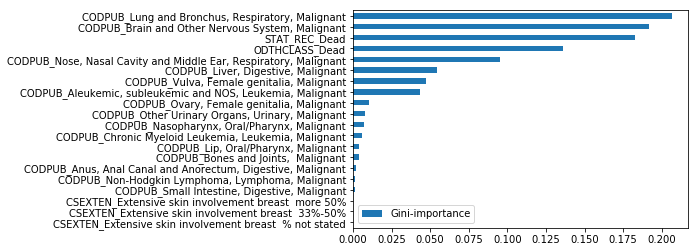

In [40]:
n = 20
importance.sort_values('Gini-importance')[-n:].plot(kind='barh')

In [56]:
vars_to_keep=importance.sort_values('Gini-importance')[-17:].index.values.tolist()

In [57]:
vars_to_keep.append('VSRTSADX')

In [59]:
sample_df=sample_df[vars_to_keep]

In [61]:
sample_df.to_csv('after_variable_importance.csv')

# PCA

In [11]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 390
%matplotlib inline

In [12]:
chunksize = 10**6
TextFileReader = pd.read_csv('after_variable_importance.csv', sep=',', chunksize=chunksize, iterator=True)
df = pd.concat(TextFileReader, ignore_index=True)


In [13]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,17].values

In [5]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.25)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.decomposition import PCA
pca=PCA()

X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [7]:
explained_variance = pca.explained_variance_ratio_

In [8]:
explained_variance

array([7.67018989e-01, 1.84212884e-01, 3.05790665e-02, 7.38568581e-03,
       4.23576711e-03, 2.57371494e-03, 1.92564009e-03, 7.01826339e-04,
       3.35246379e-04, 3.22603321e-04, 2.84663320e-04, 1.39191013e-04,
       1.07558407e-04, 8.22618374e-05, 8.22464493e-05, 1.26554149e-05])

In [9]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, variance in zip(df.columns, pca.explained_variance_ratio_):
    feats[feature] = variance #add the name/value pair 

variance = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'pca.explained_variance_ratio_'})

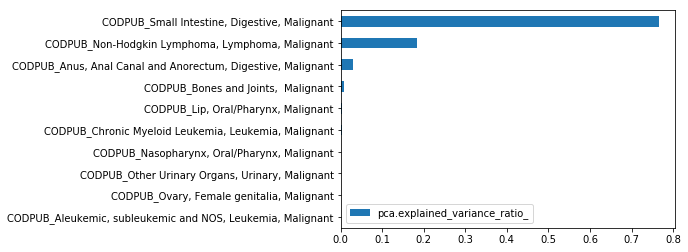

In [10]:
n = 10
variance.sort_values('pca.explained_variance_ratio_')[-n:].plot(kind='barh');

In [11]:
variance.sort_values('pca.explained_variance_ratio_')[-n:].index.tolist()

['CODPUB_Aleukemic, subleukemic and NOS, Leukemia, Malignant',
 'CODPUB_Ovary, Female genitalia, Malignant',
 'CODPUB_Other Urinary Organs, Urinary, Malignant',
 'CODPUB_Nasopharynx, Oral/Pharynx, Malignant',
 'CODPUB_Chronic Myeloid Leukemia, Leukemia, Malignant',
 'CODPUB_Lip, Oral/Pharynx, Malignant',
 'CODPUB_Bones and Joints,  Malignant',
 'CODPUB_Anus, Anal Canal and Anorectum, Digestive, Malignant',
 'CODPUB_Non-Hodgkin Lymphoma, Lymphoma, Malignant',
 'CODPUB_Small Intestine, Digestive, Malignant']

In [12]:
indices = [0,5,10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,"CODPUB_Small Intestine, Digestive, Malignant","CODPUB_Non-Hodgkin Lymphoma, Lymphoma, Malignant","CODPUB_Anus, Anal Canal and Anorectum, Digestive, Malignant","CODPUB_Bones and Joints, Malignant","CODPUB_Lip, Oral/Pharynx, Malignant","CODPUB_Chronic Myeloid Leukemia, Leukemia, Malignant","CODPUB_Nasopharynx, Oral/Pharynx, Malignant","CODPUB_Other Urinary Organs, Urinary, Malignant","CODPUB_Ovary, Female genitalia, Malignant","CODPUB_Aleukemic, subleukemic and NOS, Leukemia, Malignant","CODPUB_Vulva, Female genitalia, Malignant","CODPUB_Liver, Digestive, Malignant","CODPUB_Nose, Nasal Cavity and Middle Ear, Respiratory, Malignant",ODTHCLASS_Dead,STAT_REC_Dead,"CODPUB_Brain and Other Nervous System, Malignant","CODPUB_Lung and Bronchus, Respiratory, Malignant",VSRTSADX
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(df)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(samples)

In [17]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (20,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)

4
	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

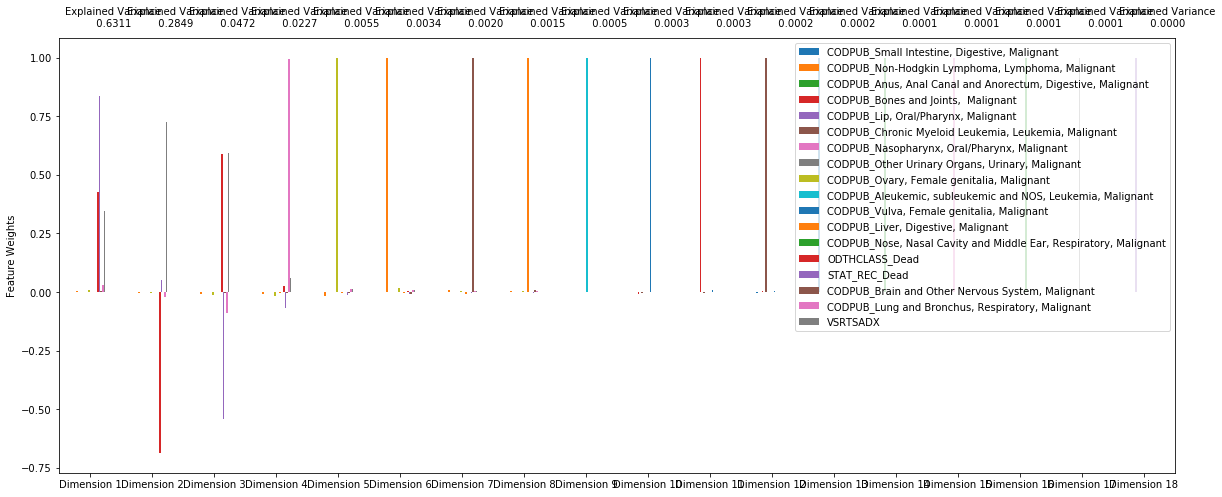

In [18]:

# Generate PCA results plot
pca_results = pca_results(df, pca)

In [29]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=4).fit(df)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(df)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2','Dimension 3', 'Dimension 4'])

In [14]:
vars_to_keep=['CODPUB_Small Intestine, Digestive, Malignant',
             'CODPUB_Non-Hodgkin Lymphoma, Lymphoma, Malignant',
             'CODPUB_Anus, Anal Canal and Anorectum, Digestive, Malignant',
             'C_Bones anODPUBd Joints,  Malignant',
             'VSRTSADX']
df=df[vars_to_keep]

In [15]:
df.to_csv('final_set.csv')

# Supervised ML

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 390
%matplotlib inline

In [2]:
chunksize = 10**6
TextFileReader = pd.read_csv('whole_list_categorical.csv', sep=',', chunksize=chunksize, iterator=True)
df = pd.concat(TextFileReader, ignore_index=True)


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df1=df['VSRTSADX']

In [4]:
vars_to_keep=['CODPUB','STAT_REC', 'ODTHCLASS', 'CSEXTEN']
df=df[vars_to_keep]

In [5]:
df_sample=pd.get_dummies(df,drop_first=True)

In [6]:
df=df_sample.join(df1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631572 entries, 0 to 1631571
Data columns (total 98 columns):
CODPUB_Acute Monocytic Leukemia, Leukemia, Malignant                                1631572 non-null uint8
CODPUB_Acute myeloid, Leukemia, Malignant                                           1631572 non-null uint8
CODPUB_Aleukemic, subleukemic and NOS, Leukemia, Malignant                          1631572 non-null uint8
CODPUB_Alive                                                                        1631572 non-null uint8
CODPUB_Anus, Anal Canal and Anorectum, Digestive, Malignant                         1631572 non-null uint8
CODPUB_Bones and Joints,  Malignant                                                 1631572 non-null uint8
CODPUB_Brain and Other Nervous System, Malignant                                    1631572 non-null uint8
CODPUB_Breast, Malignant                                                            1631572 non-null uint8
CODPUB_Cervix Uteri, Female gen

In [8]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,97].values

In [9]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.25)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1223679 samples.
Testing set has 407893 samples.


In [11]:
df.head()

,"CODPUB_Acute Monocytic Leukemia, Leukemia, Malignant","CODPUB_Acute myeloid, Leukemia, Malignant","CODPUB_Aleukemic, subleukemic and NOS, Leukemia, Malignant",CODPUB_Alive,"CODPUB_Anus, Anal Canal and Anorectum, Digestive, Malignant","CODPUB_Bones and Joints, Malignant","CODPUB_Brain and Other Nervous System, Malignant","CODPUB_Breast, Malignant","CODPUB_Cervix Uteri, Female genitalia, Malignant","CODPUB_Chronic Lymphocytic Leukemia, Leukemia, Malignant",...,CSEXTEN_T1c,CSEXTEN_T1mi,CSEXTEN_T3,CSEXTEN_T4 -NOS,CSEXTEN_T4a,CSEXTEN_T4b,CSEXTEN_T4c,CSEXTEN_T4d,CSEXTEN_Unknown,VSRTSADX
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
TP = np.sum(df['VSRTSADX'])
TP

234470

In [13]:
FP = df['VSRTSADX'].count() - TP
FP

1397102

In [14]:
TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

In [15]:
#  Calculate accuracy, precision and recall
accuracy = TP/(TP + FP)
precision = TP/(TP + FP)
recall = TP/(TP + FN)

#  Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
b=0.5
fscore = (1+b**2)*(precision/recall)/((precision*b**2)+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.1437, F-score: 0.1734]


In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
 

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], 
    #training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end - start
        
    #  Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] =  end - start
            
    #  Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    #  Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [17]:
#  Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#  Initialize the three models
clf_A = RandomForestClassifier()
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = GradientBoostingClassifier (random_state=0)

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
#  samples_100 is the entire training set i.e. len(y_train)
#  samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
#  samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.1)
samples_1 = int(len(y_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


RandomForestClassifier trained on 12236 samples.
RandomForestClassifier trained on 122367 samples.
RandomForestClassifier trained on 1223679 samples.
DecisionTreeClassifier trained on 12236 samples.
DecisionTreeClassifier trained on 122367 samples.
DecisionTreeClassifier trained on 1223679 samples.
GradientBoostingClassifier trained on 12236 samples.
GradientBoostingClassifier trained on 122367 samples.
GradientBoostingClassifier trained on 1223679 samples.


In [18]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

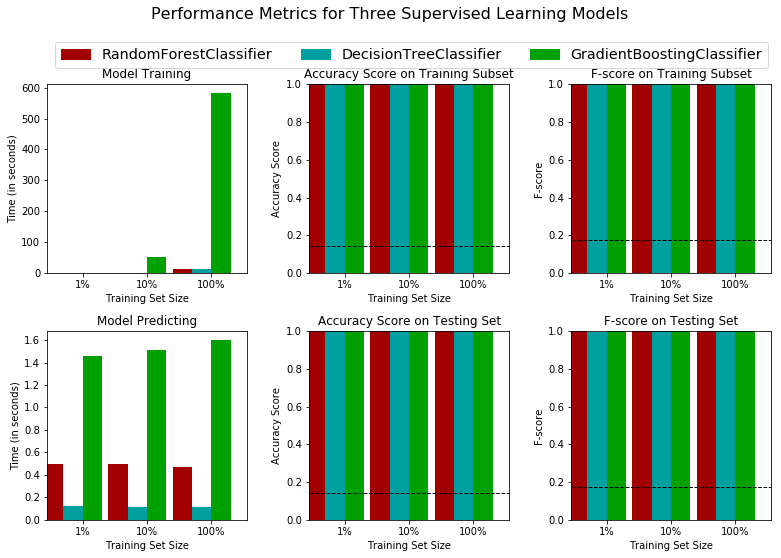

In [19]:
# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

In [21]:
#  Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

#  Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

#  Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = { 'learning_rate': [0.2, 0.3,0.4], 'max_depth' :[3, 5, 7] }

#  Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta =0.5)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters, scoring = scorer, cv = kfold)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
